<a href="https://colab.research.google.com/github/Mayank0195/Capstone_Project_Zomato_Resturant_Clustering_and_Sentimental_Analysis/blob/main/ZOMATO_RESTAURANT_CLUSTERING_AND_SENTIMENT_ANALYSIS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Problem Statement**

Zomato is an Indian restaurant aggregator and food delivery start-up founded by Deepinder Goyal and Pankaj Chaddah in 2008. Zomato provides information, menus and user-reviews of restaurants, and also has food delivery options from partner restaurants in select cities.

India is quite famous for its diverse multi cuisine available in a large number of restaurants and hotel resorts, which is reminiscent of unity in diversity. Restaurant business in India is always evolving. More Indians are warming up to the idea of eating restaurant food whether by dining outside or getting food delivered. The growing number of restaurants in every state of India has been a motivation to inspect the data to get some insights, interesting facts and figures about the Indian food industry in each city. So, this project focuses on analysing the Zomato restaurant data for each city in India.

The Project focuses on Customers and Company, you have  to analyze the sentiments of the reviews given by the customer in the data and made some useful conclusion in the form of Visualizations. Also, cluster the zomato restaurants into different segments. The data is vizualized as it becomes easy to analyse data at instant. The Analysis also solve some of the business cases that can directly help the customers finding the Best restaurant in their locality and for the company to grow up and work on the fields they are currently lagging in.

This could help in clustering the restaurants into segments. Also the data has valuable information around cuisine and costing which can be used in cost vs. benefit analysis

Data could be used for sentiment analysis. Also the metadata of reviewers can be used for identifying the critics in the industry. 

### **Attribute Information**

#### **Zomato Restaurant names and Metadata**
Use this dataset for clustering part

1. Restaurant : Name of the Restaurant

2. Reviewer : Name of the Reviewer

3. Review : Review Text

4. Rating : Rating Provided by Reviewer

5. MetaData : Reviewer Metadata - No. of Reviews and followers

6. Time: Date and Time of Review

7. Pictures : No. of pictures posted with review

###**Notebook Breakdown:**
* Business Problem Analysis
* Data Collection
* Data Cleaning and Preprocessing
* Feature Engineering
* Exploratory Data Analysis
    - Best Restaurants in the City
    - The Most Popular Cuisines in Hyderabad
    - Restaurants and their Costs
    - Cost-Benefit Analysis
    - Hypotheses Generation on visualized data for Clustering
* Restaurant Clustering
    - K means Clustering on Cost and Ratings
    - Multi-Dimensional K means Restaurant Clustering 
        -  Principal Component Analysis
        -  Silhouette Score
        -  K means Clustering
        -  Cluster Exploration
* Sentiment Analysis 
    -  Exploratory Data Analysis
        -  Critics in the Industry
    -  Text Pre-Processing and Text Visualization
    - Modeling
* Conclusion

###**Business Problem Analysis**

Indian cuisine consists of a variety of regional and traditional cuisines native to the Indian subcontinent. With every state, you can find something different to love. Besides traditional North Indian and South Indian food, the food culture is heavily inspired by and evolved around various civilizations. To say that Indians are food lovers would be an understatement. 
The restaurant business in India has been booming and people even like to celebrate small occasions of their lives with good food and great ambiance. 
Here comes Zomato, connecting people and restaurants.
Zomato is an Indian restaurant aggregator which provides information, menus, and user reviews of restaurants, and also has food delivery options. They basically take orders on the restaurant's behalf and get the food delivered at the convenience of your doorstep.

The problem statement here has two datasets for us to work on:
* Zomato Restaurant Names and Metadata
* Zomato Restaurant Reviews

To assure Zomato's success it is important for the company to analyze its datasets and make appropriate strategic decisions. The problem statement here asks us to cluster the restaurants to help customers find the best restaurants in their city and according to their taste and understand the fields they are lagging in. This will help Zomato in building a good recommendation system for their customers. Do a cost-benefit analysis using the cuisines and costs of the restaurants.
In order to understand fields that need to be worked upon, it is important to do sentiment analysis to get an idea about how people really feel about a particular restaurant. To identify the industry critics and  especially work on their reviews to build a reputation worth praising.


In [1]:
#importing all the important librarys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import time
from wordcloud import WordCloud
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, plot_precision_recall_curve
from sklearn.metrics import precision_score,recall_score,f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
sns.set_style("whitegrid",{'grid.linestyle': '--'})
plt.rcParams.update({'figure.figsize':(8,5),'figure.dpi':100})
from datetime import datetime

# Set the display figure size using rcParams method 
sns.set(rc={'figure.figsize':(20,10)})
plt.rcParams['figure.figsize'] = [20,10]



## **1. Dataset Reading**

In [2]:
#mounting drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
#reading datasets
metadata_df = pd.read_csv("/content/drive/MyDrive/AlmaBetter/Capstone_Project_ML_Unsupervised/Zomato Restaurant names and Metadata.csv")
reviews_df = pd.read_csv("/content/drive/MyDrive/AlmaBetter/Capstone_Project_ML_Unsupervised/Zomato Restaurant reviews.csv")

### **Checking the Head and Tail of the Metadata and Reviews**

In [4]:
metadata_df.head()

Name  \
0                 Beyond Flavours   
1                        Paradise   
2                        Flechazo   
3  Shah Ghouse Hotel & Restaurant   
4      Over The Moon Brew Company   

                                               Links   Cost  \
0  https://www.zomato.com/hyderabad/beyond-flavou...    800   
1  https://www.zomato.com/hyderabad/paradise-gach...    800   
2  https://www.zomato.com/hyderabad/flechazo-gach...  1,300   
3  https://www.zomato.com/hyderabad/shah-ghouse-h...    800   
4  https://www.zomato.com/hyderabad/over-the-moon...  1,200   

                                         Collections  \
0  Food Hygiene Rated Restaurants in Hyderabad, C...   
1                                Hyderabad's Hottest   
2                 Great Buffets, Hyderabad's Hottest   
3                             Late Night Restaurants   
4  Best Bars & Pubs, Food Hygiene Rated Restauran...   

                                            Cuisines  \
0  Chinese, Continental, Kebab, European, South I...   
1                     Biryani, North Indian, Chinese   
2       Asian, Mediterranean, North Indian, Desserts   
3  Biryani, North Indian, Chinese, Seafood, Bever...   
4  Asian, Continental, North Indian, Chinese, Med...   

                                             Timings  
0      12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)  
1                                     11 AM to 11 PM  
2              11:30 AM to 4:30 PM, 6:30 PM to 11 PM  
3                                    12 Noon to 2 AM  
4  12noon to 11pm (Mon, Tue, Wed, Thu, Sun), 12no...

In [5]:
metadata_df.tail()

Name  \
100                               IndiBlaze   
101                            Sweet Basket   
102                        Angaara Counts 3   
103                             Wich Please   
104  Republic Of Noodles - Lemon Tree Hotel   

                                                 Links   Cost  \
100  https://www.zomato.com/hyderabad/indiblaze-gac...    600   
101  https://www.zomato.com/hyderabad/sweet-basket-...    200   
102  https://www.zomato.com/hyderabad/angaara-count...    500   
103  https://www.zomato.com/hyderabad/wich-please-1...    250   
104  https://www.zomato.com/hyderabad/republic-of-n...  1,700   

              Collections                         Cuisines  \
100                   NaN                 Fast Food, Salad   
101                   NaN                   Bakery, Mithai   
102                   NaN   North Indian, Biryani, Chinese   
103                   NaN                        Fast Food   
104  Pan-Asian Delicacies  Thai, Asian, Chinese, Malaysian   

                                               Timings  
100                                     11 AM to 11 PM  
101  10 AM to 10 PM (Mon-Thu), 8 AM to 10:30 PM (Fr...  
102                                   12 Noon to 11 PM  
103                           8am to 12:30AM (Mon-Sun)  
104              11:30 AM to 3 PM, 7 PM to 12 Midnight

In [6]:
#first five rows of reviews dataset
reviews_df.head()

Restaurant              Reviewer  \
0  Beyond Flavours     Rusha Chakraborty   
1  Beyond Flavours  Anusha Tirumalaneedi   
2  Beyond Flavours       Ashok Shekhawat   
3  Beyond Flavours        Swapnil Sarkar   
4  Beyond Flavours                Dileep   

                                              Review Rating  \
0  The ambience was good, food was quite good . h...      5   
1  Ambience is too good for a pleasant evening. S...      5   
2  A must try.. great food great ambience. Thnx f...      5   
3  Soumen das and Arun was a great guy. Only beca...      5   
4  Food is good.we ordered Kodi drumsticks and ba...      5   

                  Metadata             Time  Pictures  
0   1 Review , 2 Followers  5/25/2019 15:54         0  
1  3 Reviews , 2 Followers  5/25/2019 14:20         0  
2  2 Reviews , 3 Followers  5/24/2019 22:54         0  
3    1 Review , 1 Follower  5/24/2019 22:11         0  
4  3 Reviews , 2 Followers  5/24/2019 21:37         0

In [7]:
reviews_df.tail()

Restaurant          Reviewer  \
9995  Chinese Pavilion  Abhishek Mahajan   
9996  Chinese Pavilion    Sharad Agrawal   
9997  Chinese Pavilion         Ramandeep   
9998  Chinese Pavilion   Nayana Shanbhag   
9999  Chinese Pavilion  Bhargava Krishna   

                                                 Review Rating  \
9995  Madhumathi Mahajan Well to start with nice cou...      3   
9996  This place has never disappointed us.. The foo...    4.5   
9997  Bad rating is mainly because of "Chicken Bone ...    1.5   
9998  I personally love and prefer Chinese Food. Had...      4   
9999  Checked in here to try some delicious chinese ...    3.5   

                          Metadata             Time  Pictures  
9995     53 Reviews , 54 Followers    6/5/2016 0:08         0  
9996      2 Reviews , 53 Followers   6/4/2016 22:01         0  
9997    65 Reviews , 423 Followers   6/3/2016 10:37         3  
9998    13 Reviews , 144 Followers  5/31/2016 17:22         0  
9999  472 Reviews , 1302 Followers  5/31/2016 16:41         6

## **2. Dataset Discovery**

**dicovering the dataset and get a notion of what the attributes describe.**

In [8]:
metadata_df.count()

Name           105
Links          105
Cost           105
Collections     51
Cuisines       105
Timings        104
dtype: int64

In [9]:
reviews_df.count()

Restaurant    10000
Reviewer       9962
Review         9955
Rating         9962
Metadata       9962
Time           9962
Pictures      10000
dtype: int64

In [10]:
metadata_df.columns

Index(['Name', 'Links', 'Cost', 'Collections', 'Cuisines', 'Timings'], dtype='object')

In [11]:
reviews_df.columns

Index(['Restaurant', 'Reviewer', 'Review', 'Rating', 'Metadata', 'Time',
       'Pictures'],
      dtype='object')

In [12]:
metadata_df.shape

(105, 6)

In [13]:
reviews_df.shape

(10000, 7)

In [14]:
#restaurnts info - null count and dtypes 
metadata_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Name         105 non-null    object
 1   Links        105 non-null    object
 2   Cost         105 non-null    object
 3   Collections  51 non-null     object
 4   Cuisines     105 non-null    object
 5   Timings      104 non-null    object
dtypes: object(6)
memory usage: 5.0+ KB


In [15]:
reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Restaurant  10000 non-null  object
 1   Reviewer    9962 non-null   object
 2   Review      9955 non-null   object
 3   Rating      9962 non-null   object
 4   Metadata    9962 non-null   object
 5   Time        9962 non-null   object
 6   Pictures    10000 non-null  int64 
dtypes: int64(1), object(6)
memory usage: 547.0+ KB


In [16]:
metadata_df.describe().transpose()

count unique                                                top  \
Name          105    105                                    Beyond Flavours   
Links         105    105  https://www.zomato.com/hyderabad/beyond-flavou...   
Cost          105     29                                                500   
Collections    51     42        Food Hygiene Rated Restaurants in Hyderabad   
Cuisines      105     92                              North Indian, Chinese   
Timings       104     77                                     11 AM to 11 PM   

            freq  
Name           1  
Links          1  
Cost          13  
Collections    4  
Cuisines       4  
Timings        6

In [17]:
reviews_df.describe()

Pictures
count  10000.000000
mean       0.748600
std        2.570381
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max       64.000000

## **3.DATA CLEANING**

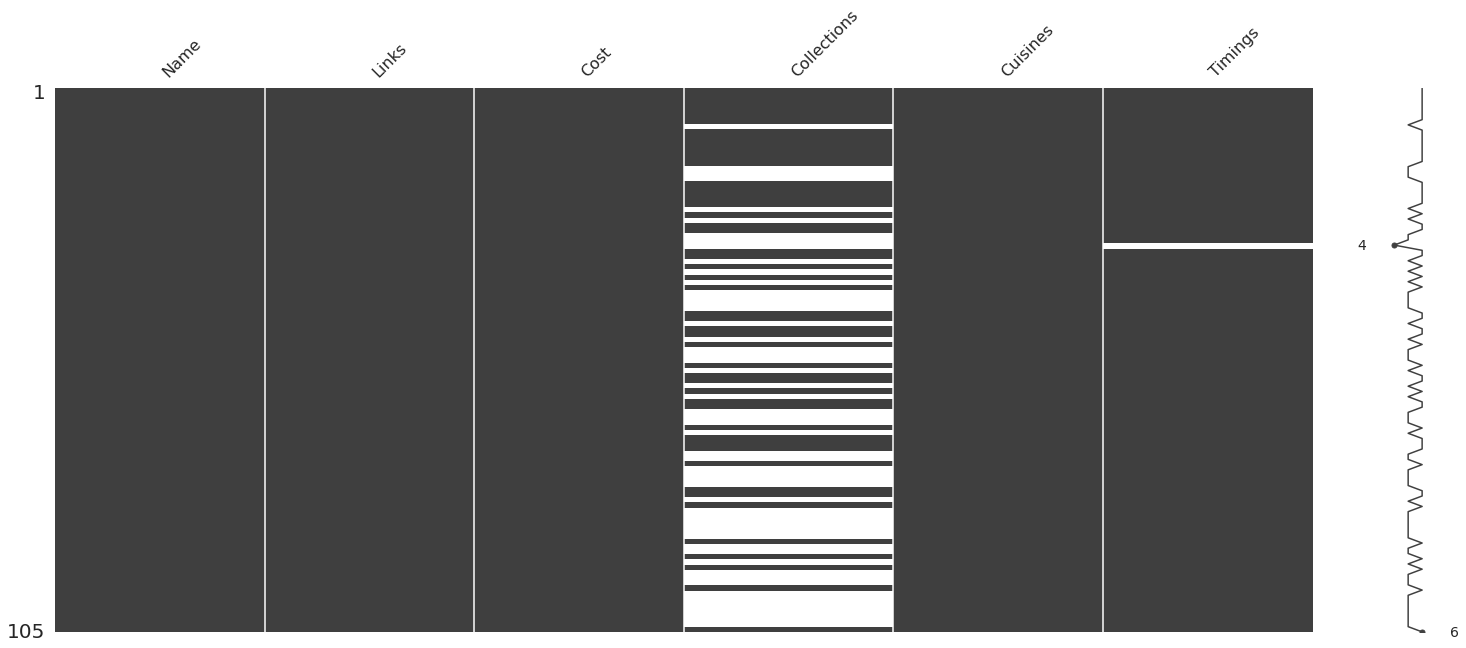

In [18]:
import missingno as msno
msno.matrix(metadata_df)
plt.show()

In [19]:
# finding the count of null values
metadata_df.isnull().sum()

Name            0
Links           0
Cost            0
Collections    54
Cuisines        0
Timings         1
dtype: int64

**Around 50% of the data is missing in the categorical column "Collections", which are basically just tags given by zomato for better search results.**
**Even when imputed with various categorical data imputing measures, it would be pretty difficult to match similar tags as the restaurants and then even more difficult to then convert them into a meaningful numerical feature afterward.**

**If the information contained in the variable is not that high, it is better to drop the variable if it has 50% or more missing values.**

In [20]:
#drop collections
metadata_df.drop('Collections', axis=1, inplace=True)

In [21]:
#Impute one missing timing row with the mode
metadata_df['Timings'].fillna(metadata_df['Timings'].mode()[0],inplace=True)

In [22]:
#check nulls
metadata_df.isnull().sum()

Name        0
Links       0
Cost        0
Cuisines    0
Timings     0
dtype: int64

In [23]:
metadata_df.Cost.unique()

array(['800', '1,300', '1,200', '1,500', '500', '300', '1,000', '350',
       '400', '1,600', '750', '550', '1,900', '450', '150', '1,400',
       '1,100', '600', '200', '900', '700', '1,700', '2,500', '850',
       '650', '1,800', '2,800', '1,750', '250'], dtype=object)

In [24]:
# changing cost datatype
metadata_df['Cost'] = metadata_df['Cost'].str.replace(',','')
metadata_df['Cost'] = metadata_df['Cost'].astype('int')

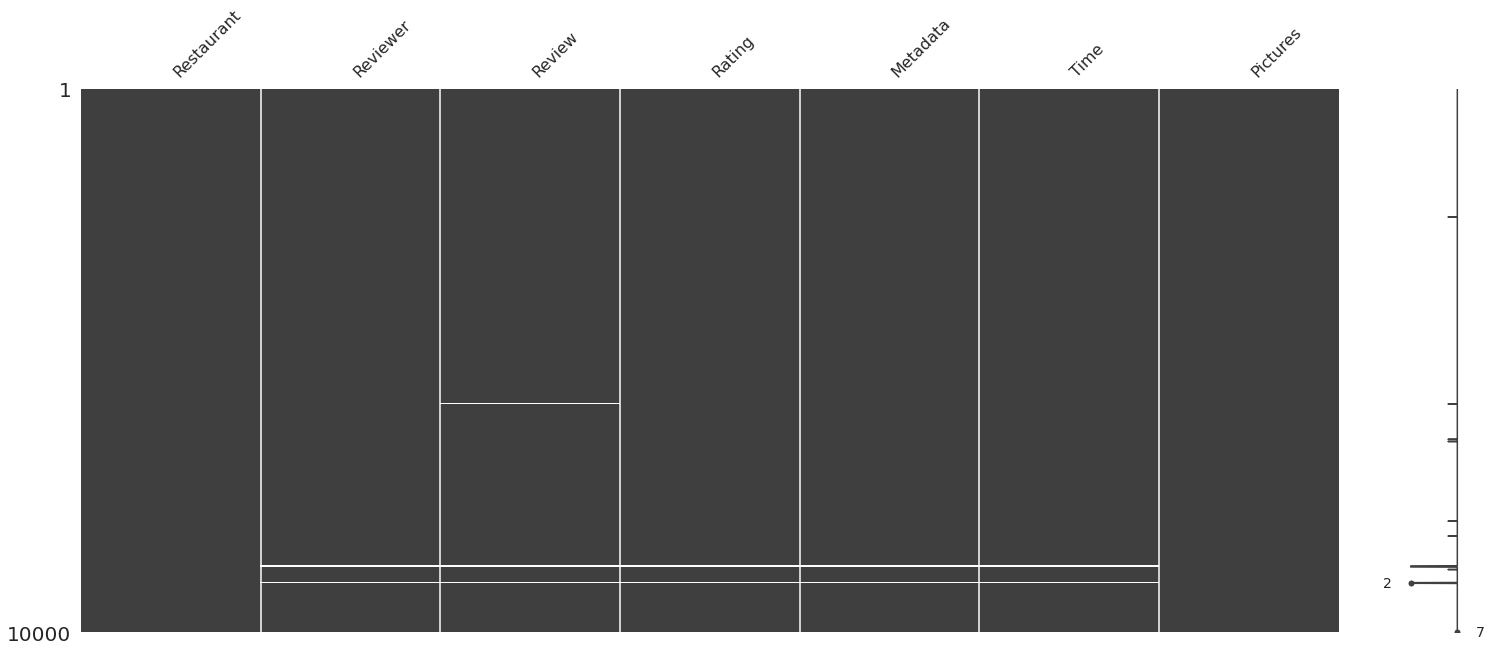

In [25]:
import missingno as msno
msno.matrix(reviews_df)
plt.show()

**The "Review" column has text that needs to be analyzed to understand the sentiments and without it, the analysis cannot be done. It can also be seen that most of the null values in the review column also have nulls in other corresponding columns such as Reviewer, Rating, Metadata, and Time. These instances should be dropped.**

In [26]:
# finding the count of null values
reviews_df.isnull().sum()

Restaurant     0
Reviewer      38
Review        45
Rating        38
Metadata      38
Time          38
Pictures       0
dtype: int64

In [27]:
#dropping null rows in reviews first
reviews_df.dropna(subset = ["Review"], inplace=True)

In [28]:
# checking
reviews_df.isnull().sum()

Restaurant    0
Reviewer      0
Review        0
Rating        0
Metadata      0
Time          0
Pictures      0
dtype: int64

In [29]:
#rating is in object type
reviews_df['Rating'].unique()

array(['5', '4', '1', '3', '2', '3.5', '4.5', '2.5', '1.5', 'Like'],
      dtype=object)

In [30]:
# substitutiong 'like' observation first by nan values and then by mean of the feature 
reviews_df.loc[reviews_df['Rating'] == 'Like'] = np.nan
reviews_df['Rating'] = reviews_df['Rating'].astype('float64')
print(reviews_df['Rating'].mean())

3.600261201527024


In [31]:
# since the mean is 3.6 we will round off it by 3.5
reviews_df['Rating'].fillna(3.5,inplace=True)

In [32]:
# feature engineering the data
reviews_df['Reviews'],reviews_df['Followers']=reviews_df['Metadata'].str.split(',').str
reviews_df['Reviews'] = pd.to_numeric(reviews_df['Reviews'].str.split(' ').str[0])
reviews_df['Followers'] = pd.to_numeric(reviews_df['Followers'].str.split(' ').str[1])
reviews_df['Time']=pd.to_datetime(reviews_df['Time'])
reviews_df['Year'] = pd.DatetimeIndex(reviews_df['Time']).year
reviews_df['Month'] = pd.DatetimeIndex(reviews_df['Time']).month
reviews_df['Hour'] = pd.DatetimeIndex(reviews_df['Time']).hour
reviews_df = reviews_df.drop(['Metadata'], axis =1)

###**Feature Engineering**

Feature engineering is the process of selecting, manipulating, and transforming raw data into meaningful numerical features that can be used by machine learning algorithms. 




####**Zomato Restaurant names and Metadata**

First, the restaurants dataset has columns such as Links, Cuisine, and Timings which aren't directly interpretable.
The location of the restaurant can be extracted by the Links column.
Cuisines can be clubbed and categorized into a few categories and a total number of cuisines served by a particular restaurant.
Timings can be categorized into thr

In [33]:
metadata_df.head()

Name  \
0                 Beyond Flavours   
1                        Paradise   
2                        Flechazo   
3  Shah Ghouse Hotel & Restaurant   
4      Over The Moon Brew Company   

                                               Links  Cost  \
0  https://www.zomato.com/hyderabad/beyond-flavou...   800   
1  https://www.zomato.com/hyderabad/paradise-gach...   800   
2  https://www.zomato.com/hyderabad/flechazo-gach...  1300   
3  https://www.zomato.com/hyderabad/shah-ghouse-h...   800   
4  https://www.zomato.com/hyderabad/over-the-moon...  1200   

                                            Cuisines  \
0  Chinese, Continental, Kebab, European, South I...   
1                     Biryani, North Indian, Chinese   
2       Asian, Mediterranean, North Indian, Desserts   
3  Biryani, North Indian, Chinese, Seafood, Bever...   
4  Asian, Continental, North Indian, Chinese, Med...   

                                             Timings  
0      12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)  
1                                     11 AM to 11 PM  
2              11:30 AM to 4:30 PM, 6:30 PM to 11 PM  
3                                    12 Noon to 2 AM  
4  12noon to 11pm (Mon, Tue, Wed, Thu, Sun), 12no...

**Links**

In [34]:
# link value
metadata_df.loc[0,'Links']

'https://www.zomato.com/hyderabad/beyond-flavours-gachibowli'

In [35]:
#function to extract location of the restaurant
def location(link):
  link_elements = link.split("/")
  return link_elements[3]

#create a location feature
metadata_df['Location'] = metadata_df['Links'].apply(location)

In [36]:
# looks like the dataset consists of the restaurants in Hyderabad
metadata_df['Location'].unique()

array(['hyderabad', 'thetiltbarrepublic'], dtype=object)

In [37]:
# exploring the other value
metadata_df[metadata_df.isin(['thetiltbarrepublic'])].stack()

68  Location    thetiltbarrepublic
dtype: object

In [38]:
#doesnt have location
metadata_df.loc[68,:]

Name                            The Tilt Bar Republic
Links       https://www.zomato.com/thetiltbarrepublic
Cost                                             1500
Cuisines           North Indian, Continental, Italian
Timings                12noon to 12midnight (Mon-Sun)
Location                           thetiltbarrepublic
Name: 68, dtype: object

In [39]:
#dropping unnecessary columns
metadata_df.drop(['Links','Location'],axis=1,inplace=True)

In [40]:
metadata_df.columns

Index(['Name', 'Cost', 'Cuisines', 'Timings'], dtype='object')

In [41]:
#let's drop time as it would not be required
reviews_df.drop(['Time'],axis=1,inplace=True)

## **Cuisines**

Here, it can be seen that the various cuisines served by every restaurant are in the form of strings and it's important to categorize and create dummy variables for all the cuisines served.
The procedure followed in doing this is as follows:
* First, strings are split to get the cuisines in the list datatype.
* A frequency dictionary is created to understand the unique cuisines and the frequency in which the cuisine occurs.
* An attempt is made to the club and categorize various misspelled cuisines and get a minimized number of unique cuisines.
* Next, we need these cuisines in the one-hot encoded form. To get these a data frame is created with the unique cuisines as columns and if a particular restaurant has this cuisine available we get a positive.

In [42]:
#splitting to create list instead of strings
metadata_df['Cuisines'] = metadata_df['Cuisines'].apply(lambda x : x.split(','))

#creating a list of all cuisine lists for different restaurants
cuisine_list = []
for idx in metadata_df.index:
  cuisine_list.append(metadata_df['Cuisines'][idx])

#creating a flat list
cuisine_list = [item for sublist in cuisine_list for item in sublist]

In [43]:
#frequency dict
frequency_dict = {}
for elem in cuisine_list:
  if elem not in frequency_dict.keys():
    frequency_dict[elem] = cuisine_list.count(elem)
  else:
    pass

#frequency dictionary
frequency_dict

{' American': 2,
 ' Andhra': 3,
 ' Arabian': 1,
 ' Asian': 10,
 ' BBQ': 1,
 ' Bakery': 1,
 ' Beverages': 5,
 ' Biryani': 12,
 ' Burger': 3,
 ' Cafe': 1,
 ' Chinese': 36,
 ' Continental': 17,
 ' Desserts': 11,
 ' European': 2,
 ' Fast Food': 10,
 ' Finger Food': 1,
 ' Goan': 1,
 ' Hyderabadi': 3,
 ' Indonesian': 1,
 ' Italian': 12,
 ' Japanese': 2,
 ' Juices': 1,
 ' Kebab': 5,
 ' Malaysian': 1,
 ' Mediterranean': 4,
 ' Mithai': 1,
 ' Modern Indian': 1,
 ' Momos': 3,
 ' Mughlai': 5,
 ' North Indian': 28,
 ' Pizza': 1,
 ' Salad': 5,
 ' Seafood': 3,
 ' South Indian': 7,
 ' Spanish': 1,
 ' Sushi': 4,
 ' Thai': 2,
 ' Wraps': 1,
 'American': 4,
 'Andhra': 3,
 'Arabian': 1,
 'Asian': 5,
 'BBQ': 1,
 'Bakery': 6,
 'Biryani': 4,
 'Burger': 2,
 'Cafe': 5,
 'Chinese': 7,
 'Continental': 4,
 'Desserts': 2,
 'European': 2,
 'Fast Food': 5,
 'Finger Food': 1,
 'Healthy Food': 1,
 'Hyderabadi': 1,
 'Ice Cream': 2,
 'Italian': 2,
 'Kebab': 1,
 'Lebanese': 1,
 'Mediterranean': 1,
 'Mexican': 1,
 'Modern 

**It is observable that many of the cuisines are misspelled in terms of an extra space added at the beginning of the string. For example, there are two categories for North Indian food - 'North Indian' and ' North Indian'.**

**Another point to note is there are various unnecessary categories made. For example, there are 'Chinese' and ' Momos' both in the dataset as different cuisines. Let's try to club and correct them.**

In [44]:
#minimising the number of cuisines by sorting and categorizing them out
cuisine_dict = {'Chinese':['Chinese',' Chinese','Momos',' Momos'],'North Indian':['North Indian',' North Indian',' BBQ','BBQ',' Biryani','Biryani','Kebab',' Kebab'],'Continental':['Continental',' Continental',' American','American',' BBQ','BBQ','Burger',' Burger','Finger Food',' Finger Food', ' Juices',' Pizza',' Salad',' Wraps'],
                'Andhra':['Andhra',' Andhra'],'Arabian':['Arabian',' Arabian'],'Asian': ['Asian',' Asian'],'Bakery':['Bakery',' Bakery'],
                'Beverages':['Beverages',' Beverages'],'Cafe':['Cafe',' Cafe'],'Desserts':['Desserts',' Desserts',' Mithai','Ice Cream'],
                'European':['European',' European',' Spanish'],'Fast Food':['Fast Food',' Fast Food','Burger',' Burger'],'Goan':[' Goan',' Goan'],
                'Hyderabadi':['Hyderabadi',' Hyderabadi',' Biryani','Biryani'],'Indonesian':['Indonesian',' Indonesian'],'Italian':['Italian',' Italian',' Pizza'],
                'Japanese':['Japanese',' Japanese',' Sushi'],'Malaysian':['Malaysian',' Malaysian'],'Mediterranean':['Mediterranean',' Mediterranean'],
                'Modern Indian':['Modern Indian',' Modern Indian',' Salad'],'Mughlai':['Mughlai',' Mughlai',' BBQ','BBQ','Kebab',' Kebab'],
                'Seafood':['Seafood',' Seafood'],'South Indian':['South Indian',' South Indian'],
                'Thai':['Thai',' Thai'],'Healthy Food':['Healthy Food'],'Lebanese':['Lebanese'],'Mexican':['Mexican'],'North Eastern':['North Eastern'],
                'Street Food':['Street Food']}

In [45]:
# just in case 
names_df = metadata_df.copy()

In [46]:
#the function returns a list of error free and mapped cuisines according to the dictionary created
def cuisine_corrector(cuisine):
  list1 = []
  # for every cuisine in the list of a particular row
  for elem in cuisine:
    # and for every key value in the dict
    for key,value in cuisine_dict.items():
      # if cuisine is correct and matches with one of the unique keys we append to the list and break
      if elem == key:
        list1.append(key)
        break
      # next if the other elem doesnot match if search and value and append the key for that value
      if elem in value:
        list1.append(key)
      
  return list(set(list1)) # returns a unique cuisines list

In [47]:
#correcting and getting the desired lists as row values for cuisines column
names_df['Cuisines'] = names_df['Cuisines'].apply(cuisine_corrector)

In [48]:
#check
names_df.head(3)

Name  Cost                                           Cuisines  \
0  Beyond Flavours   800  [Mughlai, Chinese, South Indian, European, Nor...   
1         Paradise   800                [North Indian, Hyderabadi, Chinese]   
2         Flechazo  1300     [Desserts, North Indian, Asian, Mediterranean]   

                                         Timings  
0  12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)  
1                                 11 AM to 11 PM  
2          11:30 AM to 4:30 PM, 6:30 PM to 11 PM

**The next step is to create column features for the unique cuisines and assign values according to the row values available.**

In [49]:
# concatenate new columns with the dataset
names_df = pd.concat([names_df,pd.DataFrame(columns=list(cuisine_dict.keys()))])

In [50]:
# iterating for every row in the dataframe
for i, row in names_df.iterrows():
  # and for every row we iterate over the new columns only
  for column in list(names_df.columns):
      if column not in ['Name','Cost','Cuisines','Timings']:
        # and check if the column is in the list of cuisines available for that row
        if column in row['Cuisines']:
          #then assign it as 1 else 0
          names_df.loc[i,column] = 1
        else:
          names_df.loc[i,column] = 0

In [51]:
#let's check
names_df.head(2)

Name   Cost                                           Cuisines  \
0  Beyond Flavours  800.0  [Mughlai, Chinese, South Indian, European, Nor...   
1         Paradise  800.0                [North Indian, Hyderabadi, Chinese]   

                                         Timings Chinese North Indian  \
0  12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)       1            1   
1                                 11 AM to 11 PM       1            1   

  Continental Andhra Arabian Asian  ... Modern Indian Mughlai Seafood  \
0           1      0       0     0  ...             0       1       0   
1           0      0       0     0  ...             0       0       0   

  South Indian Thai Healthy Food Lebanese Mexican North Eastern Street Food  
0            1    0            0        0       0             0           0  
1            0    0            0        0       0             0           0  

[2 rows x 33 columns]

In [52]:
# value for 1st restaurant and verifying 
names_df.loc[0,'Cuisines']

['Mughlai',
 'Chinese',
 'South Indian',
 'European',
 'North Indian',
 'Continental']

In [53]:
#creating a new column for the total number of cusines served by restaurants
names_df['Total Cuisines'] = names_df['Cuisines'].apply(lambda x : len(x))


In [54]:
#drop cuisines column
names_df.drop(['Cuisines'],axis=1,inplace=True)

**Timings**

In [55]:
#analyse the unique values in Timings
names_df['Timings'].unique()

array(['12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)', '11 AM to 11 PM',
       '11:30 AM to 4:30 PM, 6:30 PM to 11 PM', '12 Noon to 2 AM',
       '12noon to 11pm (Mon, Tue, Wed, Thu, Sun), 12noon to 12midnight (Fri-Sat)',
       '12Noon to 3:30PM, 4PM to 6:30PM, 7PM to 11:30PM (Mon, Tue, Wed, Thu, Sun), 12Noon to 3:30PM, 4PM to 6:30PM, 7PM to 12Midnight (Fri-Sat)',
       '7 AM to 10 PM', '12 Noon to 12 Midnight',
       '10 AM to 1 AM (Mon-Thu), 10 AM to 1:30 AM (Fri-Sun)',
       '12 Noon to 3:30 PM, 7 PM to 10:30 PM',
       '12 Noon to 3:30 PM, 6:30 PM to 11:30 PM', '11:30 AM to 1 AM',
       '12noon to 12midnight (Mon-Sun)',
       '12 Noon to 4:30 PM, 6:30 PM to 11:30 PM', '12 Noon to 10:30 PM',
       '12 Noon to 11 PM', '12:30 PM to 10 PM (Tue-Sun), Mon Closed',
       '11:30 AM to 3 PM, 7 PM to 11 PM',
       '11am to 11:30pm (Mon, Tue, Wed, Thu, Sun), 11am to 12midnight (Fri-Sat)',
       '10 AM to 5 AM',
       '12 Noon to 12 Midnight (Mon-Thu, Sun), 12 Noon to 1 AM (Fri-S

**Upon analyzing the unique values in the timings columns, it can be concluded that the restaurants are more or less open at the same timings and don't really provide a considerable variation in order to cluster the restaurants.**

In [56]:
#drop timings
names_df.drop(['Timings'],axis=1,inplace=True)

**Restaurant Average Ratings**

In [57]:
# groupby restaurant and ratings to get average ratings
restaurant_ratings = reviews_df.groupby('Restaurant')['Rating'].mean().reset_index()
restaurant_ratings.rename(columns={'Restaurant':'Name'},inplace=True)
#sort restaurants according to ratings and getting top 5 restaurants
restaurant_ratings.sort_values(by='Rating',ascending = False).head()

Name  Rating
3        AB's - Absolute Barbecues    4.88
11                          B-Dubs    4.81
2   3B's - Buddies, Bar & Barbecue    4.76
67                        Paradise    4.70
35                        Flechazo    4.66

In [58]:
#adding an average rating feature in restaurant names and metadata dataframe
names_df = names_df.merge(restaurant_ratings,on='Name',how='left')
names_df.rename(columns={'Rating':'Avg Rating'},inplace=True)
names_df.head(1)

Name   Cost Chinese North Indian Continental Andhra Arabian  \
0  Beyond Flavours  800.0       1            1           1      0       0   

  Asian Bakery Beverages  ... Seafood South Indian Thai Healthy Food Lebanese  \
0     0      0         0  ...       0            1    0            0        0   

  Mexican North Eastern Street Food Total Cuisines Avg Rating  
0       0             0           0              6       4.28  

[1 rows x 33 columns]

In [59]:
# info on the final dataset
names_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 105 entries, 0 to 104
Data columns (total 33 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Name            105 non-null    object 
 1   Cost            105 non-null    float64
 2   Chinese         105 non-null    object 
 3   North Indian    105 non-null    object 
 4   Continental     105 non-null    object 
 5   Andhra          105 non-null    object 
 6   Arabian         105 non-null    object 
 7   Asian           105 non-null    object 
 8   Bakery          105 non-null    object 
 9   Beverages       105 non-null    object 
 10  Cafe            105 non-null    object 
 11  Desserts        105 non-null    object 
 12  European        105 non-null    object 
 13  Fast Food       105 non-null    object 
 14  Goan            105 non-null    object 
 15  Hyderabadi      105 non-null    object 
 16  Indonesian      105 non-null    object 
 17  Italian         105 non-null    obj

In [60]:
#five restaurants have not been rated by people yet
names_df['Avg Rating'].fillna(0,inplace=True)

####**Zomato Restaurant Reviews**

In [61]:
#head
reviews_df.head(1)

Restaurant           Reviewer  \
0  Beyond Flavours  Rusha Chakraborty   

                                              Review  Rating  Pictures  \
0  The ambience was good, food was quite good . h...     5.0       0.0   

   Reviews  Followers    Year  Month  Hour  
0      1.0        2.0  2019.0    5.0  15.0

In [62]:
# Checking null values observation in Followers feature
reviews_df[reviews_df['Followers'].isna()]

Restaurant          Reviewer  \
5      Beyond Flavours     Nagabhavani K   
6      Beyond Flavours   Jamuna Bhuwalka   
7      Beyond Flavours         Sandhya S   
14     Beyond Flavours     Kankaria.ritu   
24     Beyond Flavours     Amritap Datta   
...                ...               ...   
9912  Chinese Pavilion          Anil Rao   
9918  Chinese Pavilion       Ajay Munjal   
9933  Chinese Pavilion   Korak Mukherjee   
9940  Chinese Pavilion     Anubinda Dash   
9948  Chinese Pavilion  Krishna Peddinti   

                                                 Review  Rating  Pictures  \
5     Ambiance is good, service is good, food is aPr...     5.0       0.0   
6     Its a very nice place, ambience is different, ...     5.0       0.0   
7     Well after reading so many reviews finally vis...     4.0       0.0   
14    We ordered corn cheese balls, manchow soup and...     1.0       0.0   
24    Excellent experience, mouthwatering food, good...     5.0       0.0   
...                                                 ...     ...       ...   
9912  The tofu with mushrooms was absolutely wonderf...     5.0       0.0   
9918  The food is delicious. Service is excellent. I...     5.0       0.0   
9933  I was here last night with 2 of my friends. We...     1.0       1.0   
9940  The food was amazing. Do not forget to try 'Mo...     4.5      10.0   
9948  Some restaurant's have figured their identity....     5.0       0.0   

      Reviews  Followers    Year  Month  Hour  
5         1.0        NaN  2019.0    5.0  15.0  
6         1.0        NaN  2019.0    5.0   1.0  
7         1.0        NaN  2019.0    5.0  15.0  
14        1.0        NaN  2019.0    5.0  21.0  
24        1.0        NaN  2019.0    5.0  23.0  
...       ...        ...     ...    ...   ...  
9912      9.0        NaN  2019.0    4.0   2.0  
9918      4.0        NaN  2019.0    2.0  13.0  
9933      9.0        NaN  2018.0    5.0  16.0  
9940     11.0        NaN  2018.0    3.0  19.0  
9948      3.0        NaN  2017.0   10.0   5.0  

[1575 rows x 10 columns]

In [63]:
# filling the nan values of followers by 0
reviews_df['Followers'].fillna(0,inplace=True)

In [64]:
reviews_df.Rating.unique()

array([5. , 4. , 1. , 3. , 2. , 3.5, 4.5, 2.5, 1.5])

In [65]:
#create a seperate detaframe for reviewers and their activity
reviewers_df = reviews_df.groupby(['Reviewer','Reviews','Followers'])['Rating'].mean().reset_index()
reviewers_df.sort_values(by=['Reviews','Followers','Rating'],ascending=[False,False,True],inplace=True,ignore_index=True)

#sorting out the crtics of the industry, these are the people with most reviews written and most followers who have given low rating on an avg
reviewers_df.head(3)

Reviewer  Reviews  Followers    Rating
0  Anvesh Chowdary   1031.0     1654.0  3.333333
1     ᴀɴ.ᴏᴛʜᴇʀ.sᴇɴ    685.0      794.0  2.000000
2           Abc098    665.0     2275.0  3.000000

In [66]:
# since all the data is cleaned and the missing data is common for all the features we can drop them all
reviews_df.dropna(inplace=True)

In [67]:
# checking null values in the data set 
reviews_df.isnull().sum()

Restaurant    0
Reviewer      0
Review        0
Rating        0
Pictures      0
Reviews       0
Followers     0
Year          0
Month         0
Hour          0
dtype: int64

###**Exploratory Data Analysis**
Exploratory data analysis is a crucial part of data analysis. It involves exploring and analyzing the dataset given to find patterns, trends and conclusions to make better decisions related to the data, often using statistical graphics and other data visualization tools to summarize the results. Python libraries like pandas are used to explore the data and matplotlib and seaborn to visualize it.

Some important aspects to include in the project are as follows:

*  Best restaurants in the city 
* The Most Popular Cuisines in Hyderabad
* Restaurants and their Costs
* Cost-Benefit Analysis
* Hypotheses Generation on visualized data for Clustering

####**Best Restaurants in the City**

There are various factors involved in choosing a good restaurant such as food, ambiance, cost, location, reviews, etc but the most important ones are cuisine, cost, and reviews.
The first thing that comes to mind while choosing a good restaurant is if the cuisine you like is available at the restaurant and then the taste should also be good. The second thing is value for money, it is important that you get what you paid for. To help in the above decisions reviews come into place. They give you an idea of what the restaurant is like from people who had been to the place several times. 

The dataset here has the features- Name, Cost, Total Cuisines, and Average Ratings to help in the decision making. Best restaurants in the city would be having low cost and high ratings and the number of total cuisines served. Let's go ahead and explore a bit.

In [68]:
# sorting out the best restaurants
best_restaurants = names_df[['Name','Avg Rating','Total Cuisines','Cost']]
best_restaurants.sort_values(by=['Avg Rating','Total Cuisines','Cost'],ascending=[False,False,True],inplace=True,ignore_index=True)
#top10
best_restaurants = best_restaurants.loc[0:9,:]
best_restaurants

Name  Avg Rating  Total Cuisines    Cost
0                AB's - Absolute Barbecues        4.88               3  1500.0
1                                   B-Dubs        4.81               1  1600.0
2           3B's - Buddies, Bar & Barbecue        4.76               3  1100.0
3                                 Paradise        4.70               3   800.0
4                                 Flechazo        4.66               4  1300.0
5                           The Indi Grill        4.60               5  1500.0
6          Zega - Sheraton Hyderabad Hotel        4.45               2  1750.0
7               Over The Moon Brew Company        4.34               5  1200.0
8                          Beyond Flavours        4.28               6   800.0
9  Cascade - Radisson Hyderabad Hitec City        4.26               4  1800.0

Text(0.5, 1.0, 'Best Restaurants in Hyderabad')

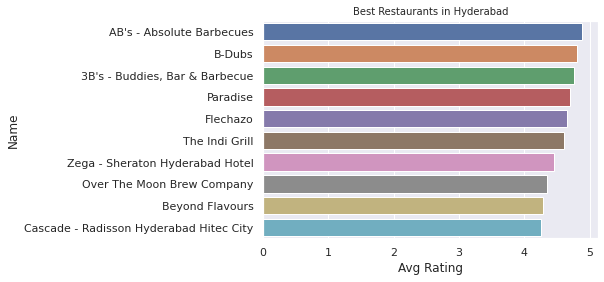

In [69]:
#visualizing the best restaurants 
sns.barplot(x='Avg Rating', y='Name',data=best_restaurants)
plt.title('Best Restaurants in Hyderabad',size=10)

Text(0.5, 1.0, 'Distribution of Average Restaurant Ratings in Hyderabad')

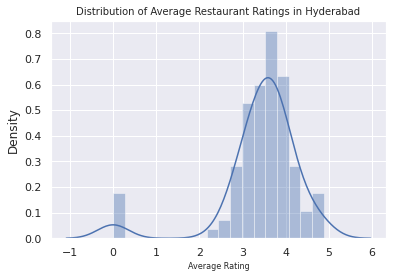

In [70]:
#distribution of Average Ratings in Hyderabad
sns.distplot(x=names_df['Avg Rating'])
plt.xlabel('Average Rating',size=8)
plt.title('Distribution of Average Restaurant Ratings in Hyderabad',size=10)

**Few restaurants in the original restaurant dataset have not been rated by the people yet, most restaurants have ratings between 3.5 and 4. Efforts should be made by the company to improve the existing restaurants by pushing them to act on the reviews and to include restaurants with better services in the future to improve overall rating distribution.**

####**The Most Popular Cuisines in Hyderabad**

In [71]:
#creating a new dataframe for the cuisines and number of restaurants providing them
#list of cuisines
cuisines1 = list(cuisine_dict.keys())
#creating a new dataframe
popular_cuisines = pd.DataFrame()
#creating a feature called cuisines and assigning unique cuisines as values
popular_cuisines['Cuisines'] = cuisines1
#creating a feature of sum of cuisines in the whole dataset
popular_cuisines['Total Restaurants'] = [names_df[i].sum() for i in cuisines1]
#sort values
popular_cuisines.sort_values('Total Restaurants',ascending=False,inplace=True,ignore_index=True)
popular_cuisines

Cuisines  Total Restaurants
0    North Indian                 64
1         Chinese                 45
2     Continental                 39
3      Hyderabadi                 18
4       Fast Food                 17
5         Italian                 15
6           Asian                 15
7        Desserts                 14
8         Mughlai                 13
9    South Indian                  9
10  Modern Indian                  7
11         Bakery                  7
12           Cafe                  6
13         Andhra                  6
14      Beverages                  5
15  Mediterranean                  5
16       Japanese                  4
17        Seafood                  4
18       European                  4
19           Thai                  3
20    Street Food                  2
21        Arabian                  2
22      Malaysian                  1
23           Goan                  1
24   Healthy Food                  1
25       Lebanese                  1
26        Mexican                  1
27  North Eastern                  1
28     Indonesian                  1

Text(0.5, 1.0, 'The Most Popular Cuisines in Hyderabad')

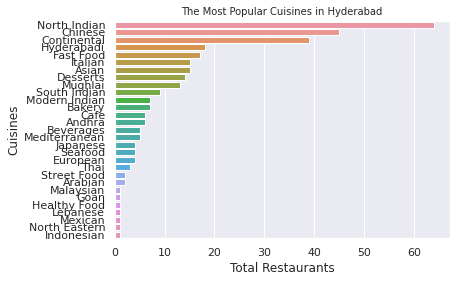

In [72]:
#visualizing cuisines
sns.barplot(x='Total Restaurants', y='Cuisines',data=popular_cuisines)
plt.title('The Most Popular Cuisines in Hyderabad',size=10)

**Although located in South India, North Indian food is dominating in the restaurants followed by Chinese, and Continental. The number of cuisines shows the diverse food options available in Hyderabad.**

####**Restaurants and their Costs**

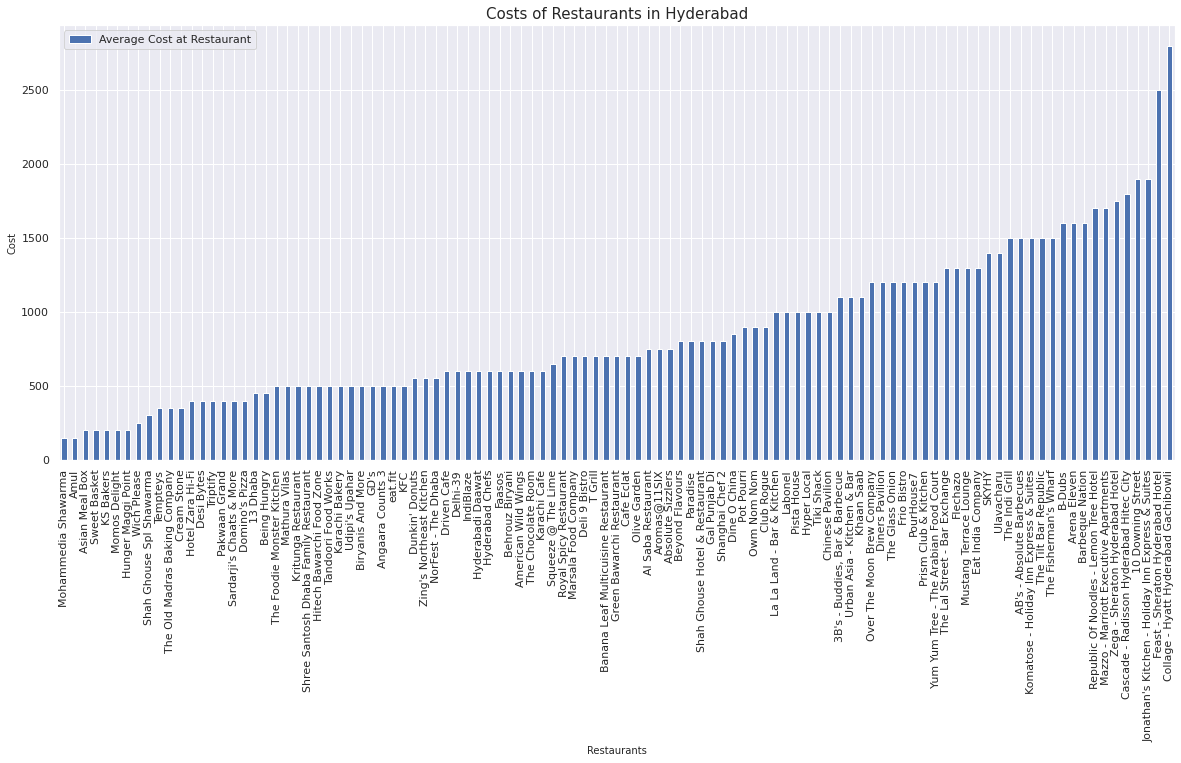

In [73]:
#visualizing Restaurant Costs
names_df.sort_values(['Cost']).plot(x="Name", y=["Cost"], kind="bar", figsize=(20, 8))
plt.xlabel('Restaurants',size=10)
plt.ylabel('Cost',size=10)
plt.title('Costs of Restaurants in Hyderabad',size=15)
plt.legend(['Average Cost at Restaurant'])

In [74]:
#top 5 cheapest restaurants
names_df[['Name','Cost']].sort_values(['Cost']).head()

Name   Cost
89   Mohammedia Shawarma  150.0
23                  Amul  150.0
54        Asian Meal Box  200.0
101         Sweet Basket  200.0
59             KS Bakers  200.0

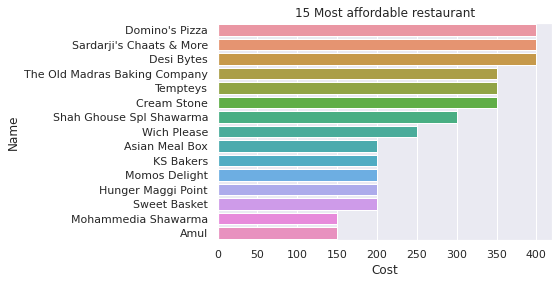

In [75]:
# checking for most affordable Restaurant
sns.barplot(x='Cost',
            y="Name", 
            data=metadata_df, 
            order=metadata_df.sort_values('Cost',ascending=False).Name[-15:])

plt.title('15 Most affordable restaurant')
plt.show()

(-0.5, 1399.5, 1399.5, -0.5)

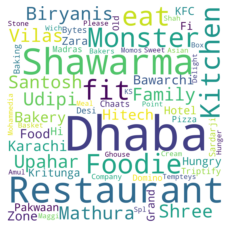

In [76]:
#Creating the text variable

text = " ".join(name for name in metadata_df.sort_values('Cost',ascending=False).Name[-30:])


# Creating word_cloud with text as argument in .generate() method

word_cloud = WordCloud(width = 1400, height = 1400,collocations = False, background_color = 'white').generate(text)

# Display the generated Word Cloud

plt.imshow(word_cloud, interpolation='bilinear')

plt.axis("off")

## **The cheapest restaurants in the dataset are basically small food joints and bakeries.**

In [77]:
#top 5 costliest restaurants
names_df[['Name','Cost']].sort_values(['Cost'],ascending=False).head()

Name    Cost
92               Collage - Hyatt Hyderabad Gachibowli  2800.0
56                   Feast - Sheraton Hyderabad Hotel  2500.0
21  Jonathan's Kitchen - Holiday Inn Express & Suites  1900.0
18                                  10 Downing Street  1900.0
91            Cascade - Radisson Hyderabad Hitec City  1800.0

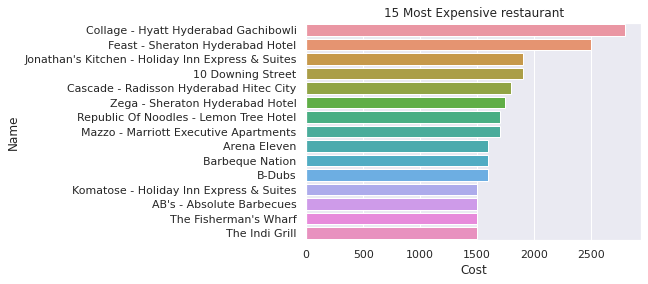

In [78]:
# checking for most expensive Restaurant
sns.barplot(x='Cost',
            y="Name", 
            data=metadata_df, 
            order=metadata_df.sort_values('Cost',ascending=False).Name[:15])

plt.title('15 Most Expensive restaurant')
plt.show()

## **The most expensive restaurants in the dataset are restaurants by 4 star above hotels.**

(-0.5, 1399.5, 1399.5, -0.5)

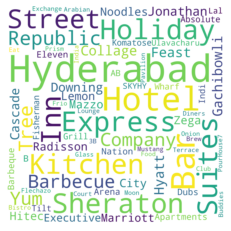

In [79]:
#Creating the text variable

text = " ".join(name for name in metadata_df.sort_values('Cost',ascending=False).Name[:30])


# Creating word_cloud with text as argument in .generate() method

word_cloud = WordCloud(width = 1400, height = 1400,collocations = False, background_color = 'white').generate(text)

# Display the generated Word Cloud

plt.imshow(word_cloud, interpolation='bilinear')

plt.axis("off")

Text(0.5, 1.0, 'Distribution of Restaurant Costs in Hyderabad')

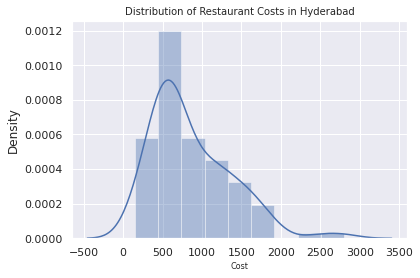

In [80]:
#distribution of Cost in Hyderabad
sns.distplot(x=names_df['Cost'])
plt.xlabel('Cost',size=8)
plt.title('Distribution of Restaurant Costs in Hyderabad',size=10)

In [81]:
# lets find the most cusines offered by Restaurants
cuis_list = metadata_df.Cuisines   
cuis_list

0      [Chinese,  Continental,  Kebab,  European,  So...
1                     [Biryani,  North Indian,  Chinese]
2      [Asian,  Mediterranean,  North Indian,  Desserts]
3      [Biryani,  North Indian,  Chinese,  Seafood,  ...
4      [Asian,  Continental,  North Indian,  Chinese,...
                             ...                        
100                                  [Fast Food,  Salad]
101                                    [Bakery,  Mithai]
102                   [North Indian,  Biryani,  Chinese]
103                                          [Fast Food]
104                 [Thai,  Asian,  Chinese,  Malaysian]
Name: Cuisines, Length: 105, dtype: object

In [82]:
# storing all the cusines in a dict 
cuis_dict = {}
for names in cuisine_list:
    for name in names:
        if (name in cuis_dict):
            cuis_dict[name]+=1
        else:  
            cuis_dict[name]=1 

In [83]:
# converting the dict to a data frame 
cuis_df=pd.DataFrame.from_dict([cuis_dict]).transpose().reset_index().rename(columns={'index':'Cuisine',0:'Number of Restaurants'})

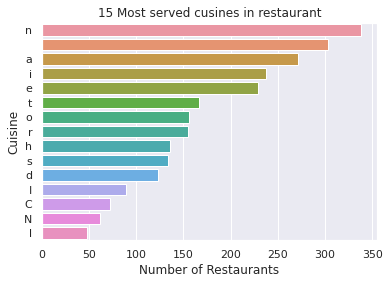

In [84]:
# graph for most cusines served in restaurant
sns.barplot(y='Cuisine',
            x="Number of Restaurants", 
            data=cuis_df, 
            order=cuis_df.sort_values('Number of Restaurants',ascending=False).Cuisine[:15])
plt.title('15 Most served cusines in restaurant')
plt.show()


In [85]:
cuis_list

0      [Chinese,  Continental,  Kebab,  European,  So...
1                     [Biryani,  North Indian,  Chinese]
2      [Asian,  Mediterranean,  North Indian,  Desserts]
3      [Biryani,  North Indian,  Chinese,  Seafood,  ...
4      [Asian,  Continental,  North Indian,  Chinese,...
                             ...                        
100                                  [Fast Food,  Salad]
101                                    [Bakery,  Mithai]
102                   [North Indian,  Biryani,  Chinese]
103                                          [Fast Food]
104                 [Thai,  Asian,  Chinese,  Malaysian]
Name: Cuisines, Length: 105, dtype: object

(-0.5, 1399.5, 1399.5, -0.5)

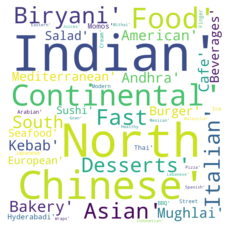

In [86]:
#Creating the text variable

text = " ".join(str(name) for name in metadata_df.Cuisines)


# Creating word_cloud with text as argument in .generate() method

word_cloud = WordCloud(width = 1400, height = 1400,collocations = False, background_color = 'white').generate(text)

# Display the generated Word Cloud

plt.imshow(word_cloud, interpolation='bilinear')

plt.axis("off")

####**Cost-Benefit Analysis**

Whenever you start a business project or make a business decision you need to analyze whether the decision will be worthwhile. A Cost-Benefit Analysis is a process of analyzing the worth of a decision by estimating the costs incurred in implementing that decision and comparing them with the benefits of that decision. 
If the projected benefits outweigh the costs, you'll be making money out of that decision and if not, it's important to strategize a better plan.

Zomato is an Indian restaurant search and an online food delivery service. Zomato focuses on online food ordering, restaurant reservations, and loyalty programs. The target customers for the company are restaurant chains that want to reach a larger audience and application users who just want to try out local restaurants and various cuisines.
Here is a simple cost-benefit analysis that can be carried out on the basis of the little information we can assume.

**Costs**

When tallying costs, beginning with direct costs, which include expenses directly related to the production or development of a product or service (or the implementation of a project or business decision) which is in the case of Zomato is primarily the mobile application. Maintaining the application, strategizing plans, including the restaurants, marketing, food delivering partners and customer support needs a huge team to work on. The salaries of the employees would be a direct cost.

Other indirect costs include utilities, rent, partners, advertisers, etc.

There are some other costs that are difficult to measure such as negative reviews on the platform which leads to people avoiding the application altogether, bad presence on social media, etc. 

**Benefits**

The major source of Revenue is Advertising. More and more restaurants want to promote themselves on the Zomato feed in order to gain attention and visibility from a large section of Zomato subscribers and customer base.

Through the food delivery service, Zomato charges a commission to the restaurants on the basis of orders. The company earns through restaurants that pay a commission for each delivery, which is then split among the delivery partners and the company. However, online food delivery only contributes a low percentage of income compared to other revenue streams because of the huge competition and the need to provide deep discounts, etc.


**Comparison**

The data that we have consists of per-person cost, cuisines available at the restaurant, and an average rating of the restaurant. If a restaurant isn't performing well in terms of rating and has a high per-person cost and a low number of popular cuisines, this is going to be a problem for Zomato.
Since negative reviews would be an intangible cost to the company and with that the company will start to lose daily application users. 
The application users are an asset to the company, Zomato gets advertising by different restaurants because of the large audience they have.

All in all, it is important to separate out the restaurants that Zomato needs to work on in order to improve its overall customer experience and if improvement strategies don't work out, they need to delist those restaurants themselves.

## Reviews

In [87]:
reviews_df.head()

Restaurant              Reviewer  \
0  Beyond Flavours     Rusha Chakraborty   
1  Beyond Flavours  Anusha Tirumalaneedi   
2  Beyond Flavours       Ashok Shekhawat   
3  Beyond Flavours        Swapnil Sarkar   
4  Beyond Flavours                Dileep   

                                              Review  Rating  Pictures  \
0  The ambience was good, food was quite good . h...     5.0       0.0   
1  Ambience is too good for a pleasant evening. S...     5.0       0.0   
2  A must try.. great food great ambience. Thnx f...     5.0       0.0   
3  Soumen das and Arun was a great guy. Only beca...     5.0       0.0   
4  Food is good.we ordered Kodi drumsticks and ba...     5.0       0.0   

   Reviews  Followers    Year  Month  Hour  
0      1.0        2.0  2019.0    5.0  15.0  
1      3.0        2.0  2019.0    5.0  14.0  
2      2.0        3.0  2019.0    5.0  22.0  
3      1.0        1.0  2019.0    5.0  22.0  
4      3.0        2.0  2019.0    5.0  21.0

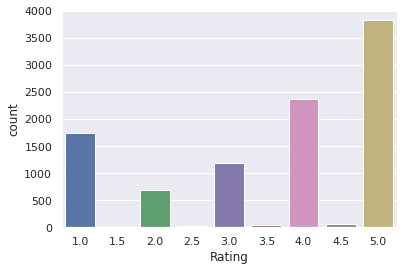

In [88]:
sns.countplot(reviews_df.Rating)

## **lets find the restaurant with best reviews**

In [89]:
reviews_df

Restaurant              Reviewer  \
0      Beyond Flavours     Rusha Chakraborty   
1      Beyond Flavours  Anusha Tirumalaneedi   
2      Beyond Flavours       Ashok Shekhawat   
3      Beyond Flavours        Swapnil Sarkar   
4      Beyond Flavours                Dileep   
...                ...                   ...   
9995  Chinese Pavilion      Abhishek Mahajan   
9996  Chinese Pavilion        Sharad Agrawal   
9997  Chinese Pavilion             Ramandeep   
9998  Chinese Pavilion       Nayana Shanbhag   
9999  Chinese Pavilion      Bhargava Krishna   

                                                 Review  Rating  Pictures  \
0     The ambience was good, food was quite good . h...     5.0       0.0   
1     Ambience is too good for a pleasant evening. S...     5.0       0.0   
2     A must try.. great food great ambience. Thnx f...     5.0       0.0   
3     Soumen das and Arun was a great guy. Only beca...     5.0       0.0   
4     Food is good.we ordered Kodi drumsticks and ba...     5.0       0.0   
...                                                 ...     ...       ...   
9995  Madhumathi Mahajan Well to start with nice cou...     3.0       0.0   
9996  This place has never disappointed us.. The foo...     4.5       0.0   
9997  Bad rating is mainly because of "Chicken Bone ...     1.5       3.0   
9998  I personally love and prefer Chinese Food. Had...     4.0       0.0   
9999  Checked in here to try some delicious chinese ...     3.5       6.0   

      Reviews  Followers    Year  Month  Hour  
0         1.0        2.0  2019.0    5.0  15.0  
1         3.0        2.0  2019.0    5.0  14.0  
2         2.0        3.0  2019.0    5.0  22.0  
3         1.0        1.0  2019.0    5.0  22.0  
4         3.0        2.0  2019.0    5.0  21.0  
...       ...        ...     ...    ...   ...  
9995     53.0       54.0  2016.0    6.0   0.0  
9996      2.0       53.0  2016.0    6.0  22.0  
9997     65.0      423.0  2016.0    6.0  10.0  
9998     13.0      144.0  2016.0    5.0  17.0  
9999    472.0     1302.0  2016.0    5.0  16.0  

[9954 rows x 10 columns]

In [90]:
df_rating = reviews_df.groupby(['Restaurant']).agg({'Rating':'mean','Restaurant':'count'}).rename(columns={'Restaurant':'number_of_rating'}).reset_index()
df_rating.describe()

Rating  number_of_rating
count  100.000000         100.00000
mean     3.601891          99.54000
std      0.508100           2.73924
min      2.400000          77.00000
25%      3.245000         100.00000
50%      3.613081         100.00000
75%      3.846250         100.00000
max      4.880000         100.00000

* looks like we got 100 rating for all the restaurants

Text(0.5, 1.0, 'Top 10 Restaurants by Rating')

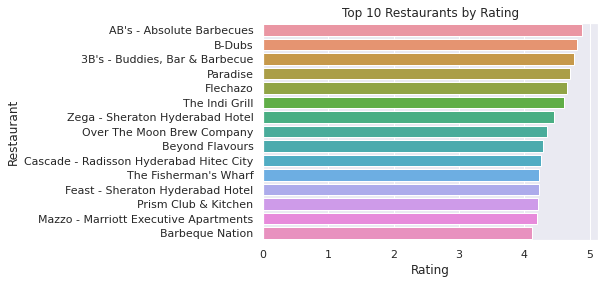

In [91]:
sns.barplot(data=df_rating, x='Rating', y='Restaurant', order=df_rating.sort_values('Rating',ascending=False).Restaurant[:15])
plt.title('Top 10 Restaurants by Rating')

In [92]:
df_Reviewer = reviews_df.groupby(['Reviewer']).agg({'Reviews':'sum','Followers':'sum','Rating':'mean'}).reset_index()
most_famous_reviewer=df_Reviewer[(df_Reviewer['Followers'] > 10000)&(df_Reviewer['Reviews']>100)&(df_Reviewer['Rating']>3.5)]
most_famous_reviewer

Reviewer  Reviews  Followers    Rating
56       Aanchal Khemka    945.0    11605.0  3.600000
903           Asad Rana   1086.0    12306.0  3.666667
1019          Avin Seth   1576.0    11064.0  4.500000
1285   Buddiga Sindhuri    300.0    10033.0  4.200000
1768        Food Nawabs    520.0    22129.0  4.000000
1786  Foodies Hyderabad    124.0    37976.0  4.500000
2173        Hungry Eyes    208.0    10258.0  5.000000
2816       Kunal Khanra    756.0    11440.0  4.750000
3480      Namit Agarwal   1253.0    13139.0  3.857143
4496      Rajat Goel ✳️    444.0    10149.0  4.000000
4902        Rohit Reddy    495.0    14860.0  3.900000
5460    Satwinder Singh    558.0    40230.0  3.666667
5780   Shravya Gunipudi   1544.0    10184.0  4.062500
5799   Shreyoshi Mandal   1085.0    12618.0  3.571429
6225           Srinivas    144.0    30514.0  3.714286
6744    Teja Dandigunta    432.0    10136.0  4.000000

In [93]:
df_Reviewer.describe([0.90])

Reviews     Followers       Rating
count  7442.000000   7442.000000  7442.000000
mean     32.111664    218.183284     3.578302
std     114.700948   1222.190701     1.502574
min       0.000000      0.000000     1.000000
50%       3.000000      4.000000     4.000000
90%      67.000000    266.900000     5.000000
max    3093.000000  40230.000000     5.000000

Text(0.5, 1.0, 'Top 15 Reviewers by no of reviews')

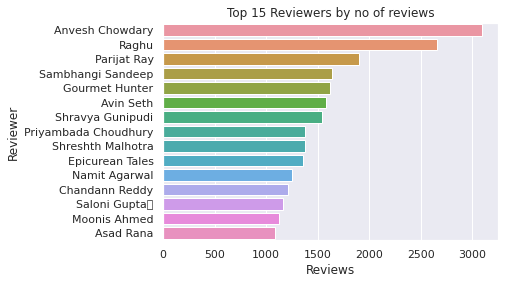

In [94]:
sns.barplot(data=df_Reviewer, x='Reviews', y='Reviewer', order=df_Reviewer.sort_values('Reviews',ascending=False).Reviewer[:15])
plt.title('Top 15 Reviewers by no of reviews')

Text(0.5, 1.0, 'Top 15 Reviewers by no of Followers')

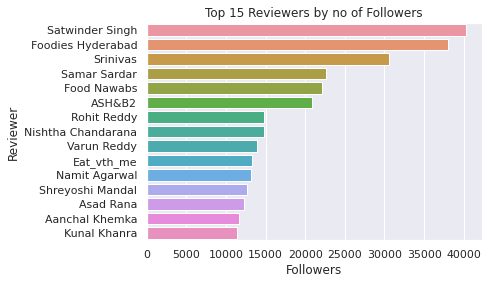

In [95]:
sns.barplot(data=df_Reviewer, x='Followers', y='Reviewer', order=df_Reviewer.sort_values('Followers',ascending=False).Reviewer[:15])
plt.title('Top 15 Reviewers by no of Followers')

Text(0.5, 1.0, 'Top reviewers to focus on')

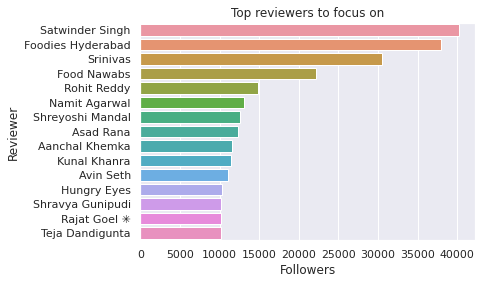

In [96]:
most_famous_reviewer
sns.barplot(data=most_famous_reviewer, x='Followers', y='Reviewer', order=most_famous_reviewer.sort_values('Followers',ascending=False).Reviewer[:15])
plt.title('Top reviewers to focus on')

* these are the reviewer  a restaurant should focus on who have reviewed more than 100 restaurants and have followers greater than 10000 with an average rating above 3.5

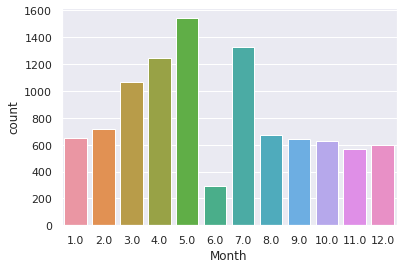

In [97]:
sns.countplot(reviews_df.Month)

*most of the reviews are in the month of 5 and 7 month of year 

In [98]:
# filtering out the restaurants with avg rating less than 3 and sorting them out acc to high cost
low_rating_df = names_df[names_df['Avg Rating'] < 3].sort_values(['Avg Rating', 'Cost'],ascending=[True,False],ignore_index=True)
low_rating_df.head(1)

Name    Cost Chinese North Indian  \
0  Republic Of Noodles - Lemon Tree Hotel  1700.0       1            0   

  Continental Andhra Arabian Asian Bakery Beverages  ... Seafood South Indian  \
0           0      0       0     1      0         0  ...       0            0   

  Thai Healthy Food Lebanese Mexican North Eastern Street Food Total Cuisines  \
0    1            0        0       0             0           0              4   

  Avg Rating  
0        0.0  

[1 rows x 33 columns]

In [99]:
#drop restaurants that were not rated yet
low_rating_df =low_rating_df[low_rating_df['Avg Rating'] != 0].reset_index(drop=True)
low_rating_df

Name   Cost Chinese North Indian  \
0                        Hotel Zara Hi-Fi  400.0       1            1   
1                          Asian Meal Box  200.0       0            0   
2                           Pakwaan Grand  400.0       1            1   
3                           Mathura Vilas  500.0       1            1   
4                         Behrouz Biryani  600.0       0            1   
5                      The Chocolate Room  600.0       0            0   
6   Shree Santosh Dhaba Family Restaurant  500.0       1            1   
7                                     KFC  500.0       0            0   
8                              Club Rogue  900.0       0            1   
9                              Desi Bytes  400.0       1            1   
10                               Delhi-39  600.0       1            1   
11                    Mohammedia Shawarma  150.0       0            0   

   Continental Andhra Arabian Asian Bakery Beverages  ... Seafood  \
0            0      0       0     0      0         0  ...       0   
1            0      0       0     1      0         0  ...       0   
2            0      0       0     0      0         0  ...       0   
3            0      0       0     0      0         0  ...       0   
4            0      0       0     0      0         0  ...       0   
5            0      0       0     0      0         0  ...       0   
6            0      0       0     0      0         0  ...       0   
7            1      0       0     0      0         0  ...       0   
8            0      0       0     0      0         0  ...       0   
9            0      0       0     0      0         0  ...       0   
10           0      0       0     0      0         0  ...       0   
11           0      0       1     0      0         0  ...       0   

   South Indian Thai Healthy Food Lebanese Mexican North Eastern Street Food  \
0             0    0            0        0       0             0           0   
1             0    0            0        0       0             0           0   
2             0    0            0        0       0             0           0   
3             1    0            0        0       0             0           0   
4             0    0            0        0       0             0           0   
5             0    0            0        0       0             0           0   
6             0    0            0        0       0             0           0   
7             0    0            0        0       0             0           0   
8             0    0            0        0       0             0           0   
9             0    0            0        0       0             0           0   
10            0    0            0        0       0             0           0   
11            0    0            0        0       0             0           1   

   Total Cuisines Avg Rating  
0               2      2.400  
1               1      2.580  
2               3      2.710  
3               3      2.820  
4               3      2.825  
5               2      2.830  
6               3      2.830  
7               2      2.850  
8               2      2.880  
9               2      2.900  
10              2      2.975  
11              2      2.990  

[12 rows x 33 columns]

Text(0.5, 1.0, 'The Cuisines in Restaurants with Low Ratings')

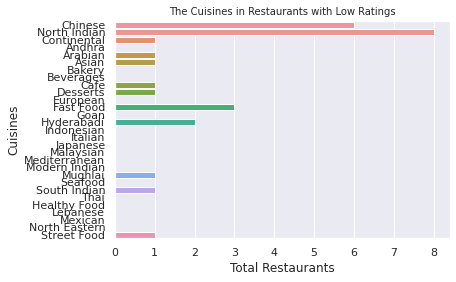

In [100]:
#cuisines involved in the low ratings dataframe
df_lr = pd.DataFrame()
df_lr['Cuisines'] = cuisines1
df_lr['Total Restaurants'] = [low_rating_df[i].sum() for i in cuisines1]
#visualizing cuisines
sns.barplot(x='Total Restaurants', y='Cuisines',data=df_lr)
plt.title(f'The Cuisines in Restaurants with Low Ratings',size=10)

Text(0.5, 1.0, 'Restaurants with Low Ratings')

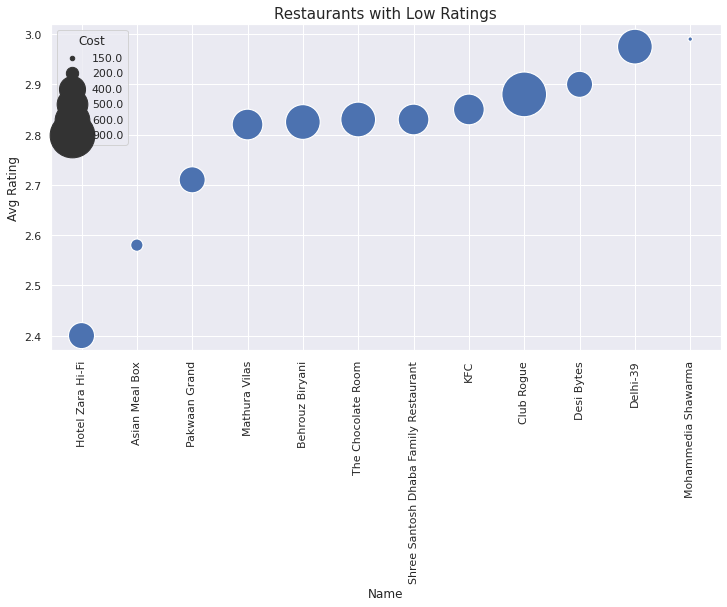

In [101]:
#visualizing the restaurants
plt.figure(figsize=(12,6))
sns.scatterplot(data=low_rating_df, x="Name", y="Avg Rating", size="Cost",alpha=1, legend=True, sizes=(20, 2000))
plt.xticks(rotation=90)
plt.title('Restaurants with Low Ratings',size=15)

**These restaurants are basically small food joints or restaurants with high prices according to the food they are serving.**
**Efforts should be made to advertise more and analyze the reviews, especially for these restaurants, and work on them.**
**Mohammedia Shawarma has the highest rating with the lowest cost. It seems it is doing well in its capacity.**

####**Hypotheses Generation on visualized data for Clustering**

Clustering is done on the basis of similarities between the data points. The similarities are understood by how closely distanced these points are. The following are some hypotheses that can be generated by finding some similarities in the visualized data:

* Restaurants with similar kinds of ratings can be clustered together. Ratings are done by people on the basis of food quality, service, packaging among other things. 
* Restaurants with high ratings would also probably be expensive and would be having a similar pricing strategy as well. They can be clustered according to the costs.
* Restaurants having some of the most popular cuisines can be clustered together and restaurants with exotic cuisines such as Indonesian, Mexican, Japanese, etc can be clustered as they are really low in number.

###**Restaurant Clustering**

**Feature Scaling**

In [102]:
#importing minmax scaler
from sklearn.preprocessing import MinMaxScaler

In [103]:
#fitting numerical columns
numerical_cols = ['Cost','Total Cuisines','Avg Rating']
scaler = MinMaxScaler()
scaler.fit(names_df[numerical_cols])
scaled_df = names_df.copy()
scaled_df[numerical_cols] = scaler.transform(names_df[numerical_cols])

In [104]:
#setting name as index for both datasets
names_df['Index'] = list(range(0,105))
names_df.set_index(['Index','Name'],inplace=True)
scaled_df['Index'] = list(range(0,105))
scaled_df.set_index(['Index','Name'],inplace=True)

####**Kmeans Clustering on Cost and Ratings**

In [105]:
#importing kmeans
from sklearn.cluster import KMeans

In [106]:
#Within Cluster Sum of Squared Errors for different values of k
#let's first take two variables only 
wcss=[]
for i in range(1,11):
    km=KMeans(n_clusters=i)
    km.fit(scaled_df[['Cost','Avg Rating']])
    wcss.append(km.inertia_)

### **Using Elbow Analysis determining optimal clusters**

Text(0, 0.5, 'WCSS')

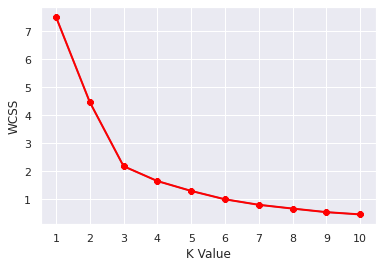

In [107]:
#The elbow curve
plt.plot(range(1,11),wcss)
plt.plot(range(1,11),wcss, linewidth=2, color="red", marker ="8")
plt.xlabel("K Value")
plt.xticks(np.arange(1,11,1))
plt.ylabel("WCSS")

**The optimal number of clusters here would be 5. It can be clearly observed that after 5 there is minimal drop in WCSS. Let's go ahead and model for 5 clusters.**

In [108]:
#create a copy
kmeans_df1 = scaled_df.copy()

In [109]:
#fit predict kmeans on 5 clusters
model1 = KMeans(n_clusters=5,random_state= 42)
pred_1 = model1.fit_predict(kmeans_df1[['Cost', 'Avg Rating']])
kmeans_df1["label"] = pred_1

Text(0.5, 1.0, 'Cost vs Average Rating')

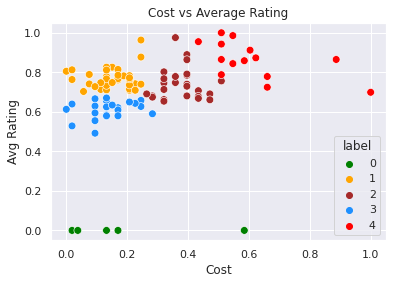

In [110]:
#Scatterplot of the clusters
sns.scatterplot(x = 'Cost',y = 'Avg Rating',hue="label",  
                 palette=['green','orange','brown','dodgerblue','red'], legend='full',data = kmeans_df1  ,s = 60 )
plt.xlabel('Cost')
plt.ylabel('Avg Rating') 
plt.title('Cost vs Average Rating')

The clusters are pretty distinguishable from each other.
Since the input variables were just two, it is easier to distinguish and interpret them.
* Label 0 are those restaurants that were in the names dataset but weren't reviewed. 
* Label 1 are the restaurants that have good ratings with low pricing.
* Label 2 are fine dining restaurants with good ratings and average pricing.
* Label 3 restaurants are small food joints with low pricing but had average ratings.
* Label 4 are expensive restaurants that also had above-average ratings.

In [111]:
#Within Cluster Sum of Squared Errors for different values of k
wcss=[]
for i in range(1,11):
    km=KMeans(n_clusters=i,random_state = 20)
    km.fit(scaled_df)
    wcss.append(km.inertia_)

Text(0, 0.5, 'WCSS')

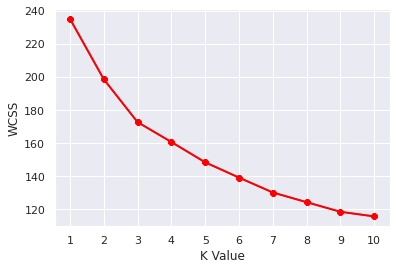

In [112]:
#The elbow curve
plt.plot(range(1,11),wcss)
plt.plot(range(1,11),wcss, linewidth=2, color="red", marker ="8")
plt.xlabel("K Value")
plt.xticks(np.arange(1,11,1))
plt.ylabel("WCSS")

* No elbow in for K-means does not mean that there are no clusters in the data
* No elbow means that the algorithm used cannot separate clusters
* K-means becomes less effective at distinguishing between examples as the dimensions are increased. This negative consequence of high-dimensional data is called the curse of dimensionality.

####**Multi-Dimensional KMeans Restaurant Clustering**
- Principal Component Analysis
- Silhouette Score
- Kmeans Clustering
- Cluster Exploration

In [113]:
#principal component analysis
from sklearn.decomposition import PCA
#choosing 3 components
pca = PCA(n_components=3)
#fitting pca
pca_result = pca.fit_transform(scaled_df)
#variance ratio
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))
# variance explained by three components
print('Cumulative variance explained by 3 principal components: {:.2%}'.format(np.sum(pca.explained_variance_ratio_)))

Explained variation per principal component: [0.19820439 0.16016856 0.08685559]
Cumulative variance explained by 3 principal components: 44.52%


Parameter: {'n_clusters': 2} Score 0.3484606510654506
Parameter: {'n_clusters': 3} Score 0.4134949891346936
Parameter: {'n_clusters': 4} Score 0.4437069606298335
Parameter: {'n_clusters': 5} Score 0.47803291589862
Parameter: {'n_clusters': 6} Score 0.5170147210982324
Parameter: {'n_clusters': 7} Score 0.5141050860377069
Parameter: {'n_clusters': 8} Score 0.5163902952300149
Parameter: {'n_clusters': 9} Score 0.5033620514816282
Parameter: {'n_clusters': 10} Score 0.5115468340530527


Text(0.5, 0, 'Number of Clusters')

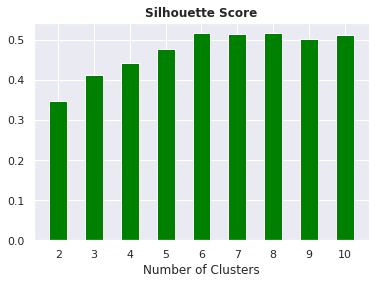

In [114]:
#silhouette score
from sklearn.metrics import silhouette_score
from sklearn.model_selection import ParameterGrid
# candidates for the number of cluster
parameters = list(range(2,11))
#parameters
parameter_grid = ParameterGrid({'n_clusters': parameters})
best_score = -1
kmeans_model = KMeans(random_state = 11)     # instantiating KMeans model
silhouette_scores = []
# evaluation based on silhouette_score
for p in parameter_grid:
    kmeans_model.set_params(**p)    # set current hyper parameter
    kmeans_model.fit(pca_result)          # fit model 
    score = silhouette_score(pca_result, kmeans_model.labels_)   # calculate silhouette_score
    silhouette_scores += [score]       # store all the scores
    print('Parameter:', p, 'Score', score)
    # check p which has the best score
    if score > best_score:
        best_score = score
        best_grid = p

# plotting 
plt.bar(range(len(silhouette_scores)), list(silhouette_scores), align='center', color='green', width=0.5)
plt.xticks(range(len(silhouette_scores)), list(parameters))
plt.title('Silhouette Score', fontweight='bold')
plt.xlabel('Number of Clusters')

In [115]:
# fitting KMeans    
kmeans_pca = KMeans(n_clusters=6,random_state=11)
kmeans_pca.fit(pca_result)

KMeans(n_clusters=6, random_state=11)

In [116]:
#fit predict kmeans 
kmeans_pca_df = pd.DataFrame(pca_result,columns=['PC1','PC2','PC3'],index=names_df.index)
pred_pca = kmeans_pca.fit_predict(pca_result)
kmeans_pca_df["label"] = pred_pca

Text(0.5, 0, 'PC3')

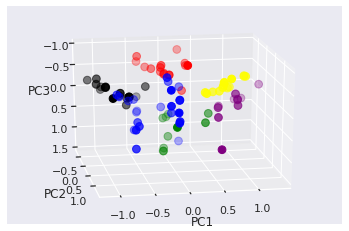

In [117]:
#plotting 3D scatter plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(kmeans_pca_df.PC1[kmeans_pca_df["label"] == 0], kmeans_pca_df.PC2[kmeans_pca_df["label"] == 0], kmeans_pca_df.PC3[kmeans_pca_df["label"] == 0], c='purple', s=60)
ax.scatter(kmeans_pca_df.PC1[kmeans_pca_df["label"] == 1], kmeans_pca_df.PC2[kmeans_pca_df["label"] == 1], kmeans_pca_df.PC3[kmeans_pca_df["label"] == 1], c='red', s=60)
ax.scatter(kmeans_pca_df.PC1[kmeans_pca_df["label"] == 2], kmeans_pca_df.PC2[kmeans_pca_df["label"] == 2], kmeans_pca_df.PC3[kmeans_pca_df["label"] == 2], c='blue', s=60)
ax.scatter(kmeans_pca_df.PC1[kmeans_pca_df["label"] == 3], kmeans_pca_df.PC2[kmeans_pca_df["label"] == 3], kmeans_pca_df.PC3[kmeans_pca_df["label"] == 3], c='green', s=60)
ax.scatter(kmeans_pca_df.PC1[kmeans_pca_df["label"]== 4], kmeans_pca_df.PC2[kmeans_pca_df["label"] == 4], kmeans_pca_df.PC3[kmeans_pca_df["label"] == 4], c='yellow', s=60)
ax.scatter(kmeans_pca_df.PC1[kmeans_pca_df["label"]== 5], kmeans_pca_df.PC2[kmeans_pca_df["label"] == 5], kmeans_pca_df.PC3[kmeans_pca_df["label"] == 5], c='black', s=60)
ax.view_init(200, 1000)
plt.xlabel("PC1")
plt.ylabel("PC2")
ax.set_zlabel('PC3')

In [118]:
#let's merge the labels to the original dataset and explore
kmeans_pca_df.head(2)

PC1       PC2       PC3  label
Index Name                                                
0     Beyond Flavours -0.885808  0.659059 -0.330773      2
1     Paradise        -0.858827 -0.606428 -0.020203      5

In [119]:
#joining the cluster labels to names dataframe
names_df = names_df.join(kmeans_pca_df['label'])
names_df.head(2)

Cost Chinese North Indian Continental Andhra Arabian  \
Index Name                                                                     
0     Beyond Flavours  800.0       1            1           1      0       0   
1     Paradise         800.0       1            1           0      0       0   

                      Asian Bakery Beverages Cafe  ... South Indian Thai  \
Index Name                                         ...                     
0     Beyond Flavours     0      0         0    0  ...            1    0   
1     Paradise            0      0         0    0  ...            0    0   

                      Healthy Food Lebanese Mexican North Eastern Street Food  \
Index Name                                                                      
0     Beyond Flavours            0        0       0             0           0   
1     Paradise                   0        0       0             0           0   

                      Total Cuisines Avg Rating label  
Index Name                                             
0     Beyond Flavours              6       4.28     2  
1     Paradise                     3       4.70     5  

[2 rows x 33 columns]

In [120]:
#value counts for different clusters
names_df['label'].value_counts()

5    25
2    24
1    17
4    16
0    13
3    10
Name: label, dtype: int64

####**Cluster Exploration**

**Cluster 0**

In [121]:
#exploring cluster 0 
names_df[names_df['label']==0].head(3)


Cost Chinese North Indian Continental Andhra Arabian  \
Index Name                                                                 
15    KFC          500.0       0            0           1      0       0   
22    B-Dubs      1600.0       0            0           1      0       0   
25    Tiki Shack  1000.0       0            0           1      0       0   

                 Asian Bakery Beverages Cafe  ... South Indian Thai  \
Index Name                                    ...                     
15    KFC            0      0         0    0  ...            0    0   
22    B-Dubs         0      0         0    0  ...            0    0   
25    Tiki Shack     0      0         0    0  ...            0    0   

                 Healthy Food Lebanese Mexican North Eastern Street Food  \
Index Name                                                                 
15    KFC                   0        0       0             0           0   
22    B-Dubs                0        0       0             0           0   
25    Tiki Shack            0        0       0             0           0   

                 Total Cuisines Avg Rating label  
Index Name                                        
15    KFC                     2       2.85     0  
22    B-Dubs                  1       4.81     0  
25    Tiki Shack              1       3.48     0  

[3 rows x 33 columns]

In [122]:
#describe
names_df[names_df['label']==0].describe()

Cost  Total Cuisines  Avg Rating  label
count    13.000000       13.000000   13.000000   13.0
mean    942.307692        2.538462    3.429798    0.0
std     625.115374        1.198289    1.159394    0.0
min     400.000000        1.000000    0.000000    0.0
25%     500.000000        2.000000    3.095000    0.0
50%     600.000000        3.000000    3.610000    0.0
75%    1200.000000        3.000000    3.974026    0.0
max    2500.000000        5.000000    4.810000    0.0

In [123]:
#cluster cuisines
def cluster_cuisines(df,cluster):
  pop_cuisines_df = pd.DataFrame()
  pop_cuisines_df['Cuisines'] = cuisines1
  pop_cuisines_df['Total Restaurants'] = [df[i].sum() for i in cuisines1]
  #visualizing cuisines
  sns.barplot(x='Total Restaurants', y='Cuisines',data=pop_cuisines_df)
  plt.title(f'The Most Popular Cuisines in {cluster}',size=10)

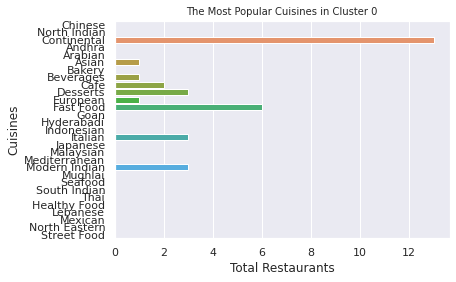

In [124]:
#visualizing cuisines in cluster 0
cluster_cuisines(names_df[names_df['label']==0],'Cluster 0')

**Cluster 0 Observation:**

*  The restaurants in cluster 0 have mostly continental and fast foods available with them.
* The average rating is 3.42 and the average cost is 942 INR which includes an outlier of cost 2500 INR and median cost of 600 INR. This means the restaurants are basically cheap in nature in this cluster beside one.

**Cluster 1**

In [125]:
#exploring cluster  
names_df[names_df['label']==1].head(3)

Cost Chinese North Indian Continental  \
Index Name                                                                 
2     Flechazo                   1300.0       0            1           0   
10    Sardarji's Chaats & More    400.0       0            1           0   
14    AB's - Absolute Barbecues  1500.0       0            1           0   

                                Andhra Arabian Asian Bakery Beverages Cafe  \
Index Name                                                                   
2     Flechazo                       0       0     1      0         0    0   
10    Sardarji's Chaats & More       0       0     0      0         0    0   
14    AB's - Absolute Barbecues      0       0     0      0         0    0   

                                 ... South Indian Thai Healthy Food Lebanese  \
Index Name                       ...                                           
2     Flechazo                   ...            0    0            0        0   
10    Sardarji's Chaats & More   ...            0    0            0        0   
14    AB's - Absolute Barbecues  ...            0    0            0        0   

                                Mexican North Eastern Street Food  \
Index Name                                                          
2     Flechazo                        0             0           0   
10    Sardarji's Chaats & More        0             0           1   
14    AB's - Absolute Barbecues       0             0           0   

                                Total Cuisines Avg Rating label  
Index Name                                                       
2     Flechazo                               4       4.66     1  
10    Sardarji's Chaats & More               3       3.25     1  
14    AB's - Absolute Barbecues              3       4.88     1  

[3 rows x 33 columns]

In [126]:
#describe
names_df[names_df['label']==1].describe()

Cost  Total Cuisines  Avg Rating  label
count    17.000000       17.000000   17.000000   17.0
mean    823.529412        2.588235    3.633235    1.0
std     363.626546        1.003670    0.624402    0.0
min     400.000000        1.000000    2.825000    1.0
25%     500.000000        2.000000    3.260000    1.0
50%     700.000000        3.000000    3.480000    1.0
75%    1100.000000        3.000000    3.800000    1.0
max    1500.000000        4.000000    4.880000    1.0

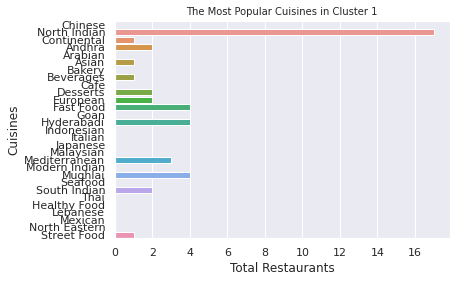

In [127]:
#visualizing cuisines in cluster 1
cluster_cuisines(names_df[names_df['label']==1],'Cluster 1')

**Cluster 1 Observation:**

*  The restaurants in cluster 1 have mostly North Indian and other complementary foods available with them.
* The average rating is 3.63 and the average cost is 823 INR which includes an outlier of cost 1500 INR and median cost of 700 INR. These restaurants are slightly higher in prices than cluster 0.

**Cluster 2**

In [128]:
#exploring cluster 2 
names_df[names_df['label']==2].head(3)

Cost Chinese North Indian Continental  \
Index Name                                                                  
0     Beyond Flavours              800.0       1            1           1   
4     Over The Moon Brew Company  1200.0       1            1           1   
5     The Fisherman's Wharf       1500.0       0            1           1   

                                 Andhra Arabian Asian Bakery Beverages Cafe  \
Index Name                                                                    
0     Beyond Flavours                 0       0     0      0         0    0   
4     Over The Moon Brew Company      0       0     1      0         0    0   
5     The Fisherman's Wharf           0       0     1      0         0    0   

                                  ... South Indian Thai Healthy Food Lebanese  \
Index Name                        ...                                           
0     Beyond Flavours             ...            1    0            0        0   
4     Over The Moon Brew Company  ...            0    0            0        0   
5     The Fisherman's Wharf       ...            0    0            0        0   

                                 Mexican North Eastern Street Food  \
Index Name                                                           
0     Beyond Flavours                  0             0           0   
4     Over The Moon Brew Company       0             0           0   
5     The Fisherman's Wharf            0             0           0   

                                 Total Cuisines Avg Rating label  
Index Name                                                        
0     Beyond Flavours                         6       4.28     2  
4     Over The Moon Brew Company              5       4.34     2  
5     The Fisherman's Wharf                   5       4.22     2  

[3 rows x 33 columns]

In [129]:
#describe
names_df[names_df['label']==2].describe()

Cost  Total Cuisines  Avg Rating  label
count    24.000000       24.000000   24.000000   24.0
mean   1331.250000        4.208333    3.776667    2.0
std     487.186354        1.020621    0.421660    0.0
min     500.000000        2.000000    3.190000    2.0
25%    1000.000000        3.750000    3.400000    2.0
50%    1250.000000        4.000000    3.807500    2.0
75%    1525.000000        5.000000    4.196250    2.0
max    2800.000000        6.000000    4.600000    2.0

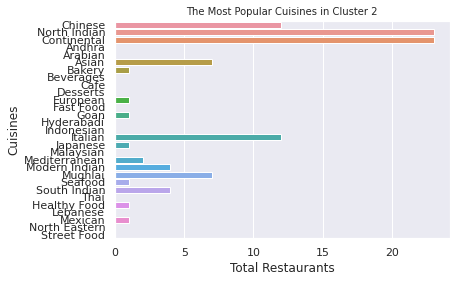

In [130]:
#visualizing cuisines in cluster 2
cluster_cuisines(names_df[names_df['label']==2],'Cluster 2')

**Cluster 2 Observation:**

*  The restaurants in cluster 2 have all the popular cuisines available with them including North Indian, Chinese and Continental.
* The average rating is 3.77 which is better than the other two clusters and the average cost is 1331 INR which includes an outlier of cost 2800 INR and median cost of 1250 INR. These restaurants are fine dining restaurants.

**Cluster 3**

In [131]:
#exploring cluster 3
names_df[names_df['label']==3].head(3)

Cost Chinese North Indian Continental Andhra  \
Index Name                                                               
12    Absolute Sizzlers  750.0       1            0           1      0   
47    Shanghai Chef 2    800.0       1            0           0      0   
54    Asian Meal Box     200.0       0            0           0      0   

                        Arabian Asian Bakery Beverages Cafe  ... South Indian  \
Index Name                                                   ...                
12    Absolute Sizzlers       0     0      0         0    0  ...            0   
47    Shanghai Chef 2         0     1      0         0    0  ...            0   
54    Asian Meal Box          0     1      0         0    0  ...            0   

                        Thai Healthy Food Lebanese Mexican North Eastern  \
Index Name                                                                 
12    Absolute Sizzlers    0            0        0       0             0   
47    Shanghai Chef 2      1            0        0       0             0   
54    Asian Meal Box       0            0        0       0             0   

                        Street Food Total Cuisines Avg Rating label  
Index Name                                                           
12    Absolute Sizzlers           0              2       3.62     3  
47    Shanghai Chef 2             0              4       3.06     3  
54    Asian Meal Box              0              1       2.58     3  

[3 rows x 33 columns]

In [132]:
#describe
names_df[names_df['label']==3].describe()

Cost  Total Cuisines  Avg Rating  label
count    10.000000       10.000000   10.000000   10.0
mean    890.000000        2.400000    3.185000    3.0
std     532.186266        1.173788    1.219617    0.0
min     200.000000        1.000000    0.000000    3.0
25%     600.000000        2.000000    3.137500    3.0
50%     825.000000        2.000000    3.635000    3.0
75%    1075.000000        3.500000    3.706250    3.0
max    1750.000000        4.000000    4.450000    3.0

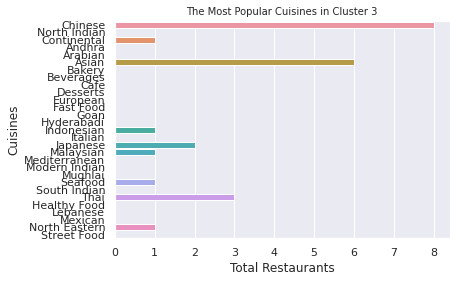

In [133]:
#visualizing cuisines in cluster 3
cluster_cuisines(names_df[names_df['label']==3],'Cluster 3')

**Cluster 3 Observation:**

*  The restaurants in cluster 3 have all exotic cuisines available with them including Chinese, Thai, Asian, Seafood among others.
* The average rating is 3.18 probably because these cuisines aren't that popular with the majority of the people in Hyderabad and the average cost is 890 INR hich includes an outlier of cost 1750 INR and median cost of 825 INR. 

**Cluster 4**

In [134]:
#exploring cluster 4
names_df[names_df['label']==4].head(3)

Cost Chinese North Indian Continental Andhra  \
Index Name                                                                      
7     Shah Ghouse Spl Shawarma  300.0       0            0           0      0   
9     Cream Stone               350.0       0            0           0      0   
23    Amul                      150.0       0            0           0      0   

                               Arabian Asian Bakery Beverages Cafe  ...  \
Index Name                                                          ...   
7     Shah Ghouse Spl Shawarma       0     0      0         0    0  ...   
9     Cream Stone                    0     0      0         0    0  ...   
23    Amul                           0     0      0         0    0  ...   

                               South Indian Thai Healthy Food Lebanese  \
Index Name                                                               
7     Shah Ghouse Spl Shawarma            0    0            0        1   
9     Cream Stone                         0    0            0        0   
23    Amul                                0    0            0        0   

                               Mexican North Eastern Street Food  \
Index Name                                                         
7     Shah Ghouse Spl Shawarma       0             0           0   
9     Cream Stone                    0             0           0   
23    Amul                           0             0           0   

                               Total Cuisines Avg Rating label  
Index Name                                                      
7     Shah Ghouse Spl Shawarma              1   3.430000     4  
9     Cream Stone                           1   3.845000     4  
23    Amul                                  1   3.929293     4  

[3 rows x 33 columns]

In [135]:
#describe
names_df[names_df['label']==4].describe()

Cost  Total Cuisines  Avg Rating  label
count    16.000000       16.000000   16.000000   16.0
mean    406.250000        1.875000    3.146278    4.0
std     240.052078        0.806226    1.275108    0.0
min     150.000000        1.000000    0.000000    4.0
25%     200.000000        1.000000    3.087500    4.0
50%     350.000000        2.000000    3.665581    4.0
75%     600.000000        2.250000    3.846250    4.0
max    1000.000000        3.000000    3.965000    4.0

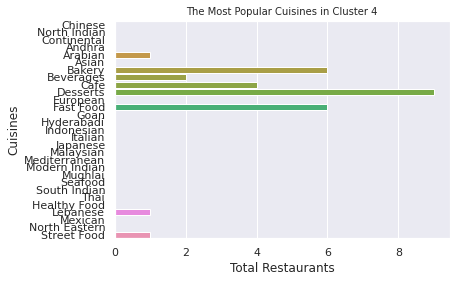

In [136]:
#visualizing cuisines in cluster 4
cluster_cuisines(names_df[names_df['label']==4],'Cluster 4')

**Cluster 4 Observation:**
*  The restaurants in cluster 4 are basically small food joints, bakeries and cafes.
* The average rating is 3.14 and the average cost is 406 INR which includes an outlier of cost 2800 INR and median cost of 1250 INR. 

**Cluster 5**

In [137]:
#exploring cluster 5
names_df[names_df['label']==5].head(3)

Cost Chinese North Indian Continental  \
Index Name                                                                     
1     Paradise                        800.0       1            1           0   
3     Shah Ghouse Hotel & Restaurant  800.0       1            1           0   
17    Hotel Zara Hi-Fi                400.0       1            1           0   

                                     Andhra Arabian Asian Bakery Beverages  \
Index Name                                                                   
1     Paradise                            0       0     0      0         0   
3     Shah Ghouse Hotel & Restaurant      0       0     0      0         1   
17    Hotel Zara Hi-Fi                    0       0     0      0         0   

                                     Cafe  ... South Indian Thai Healthy Food  \
Index Name                                 ...                                  
1     Paradise                          0  ...            0    0            0   
3     Shah Ghouse Hotel & Restaurant    0  ...            0    0            0   
17    Hotel Zara Hi-Fi                  0  ...            0    0            0   

                                     Lebanese Mexican North Eastern  \
Index Name                                                            
1     Paradise                              0       0             0   
3     Shah Ghouse Hotel & Restaurant        0       0             0   
17    Hotel Zara Hi-Fi                      0       0             0   

                                     Street Food Total Cuisines Avg Rating  \
Index Name                                                                   
1     Paradise                                 0              3       4.70   
3     Shah Ghouse Hotel & Restaurant           0              5       3.21   
17    Hotel Zara Hi-Fi                         0              2       2.40   

                                     label  
Index Name                                  
1     Paradise                           5  
3     Shah Ghouse Hotel & Restaurant     5  
17    Hotel Zara Hi-Fi                   5  

[3 rows x 33 columns]

In [138]:
#describe
names_df[names_df['label']==5].describe()

Cost  Total Cuisines  Avg Rating  label
count    25.000000        25.00000   25.000000   25.0
mean    674.000000         3.16000    3.240249    5.0
std     272.381473         0.85049    0.834899    0.0
min     400.000000         2.00000    0.000000    5.0
25%     500.000000         3.00000    2.975000    5.0
50%     600.000000         3.00000    3.290000    5.0
75%     750.000000         4.00000    3.690000    5.0
max    1500.000000         5.00000    4.700000    5.0

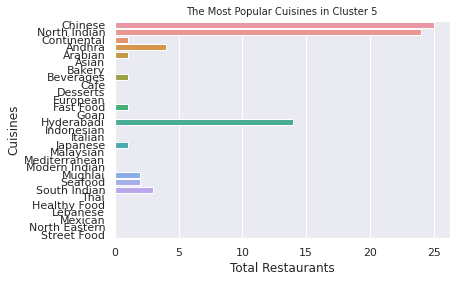

In [139]:
#visualizing cuisines in cluster 5
cluster_cuisines(names_df[names_df['label']==5],'Cluster 5')

**Cluster 5 Observation:**
* The restaurants in cluster 5 have popular cuisines available with them including North Indian, Chinese and especially Hyderabadi.
* The average rating is 3.24 the average cost is 674 INR. These restaurants are casual dining restaurants with lower per person cost and rating than cluster 2.

Text(0.5, 1.0, 'Overall Ratings Count')

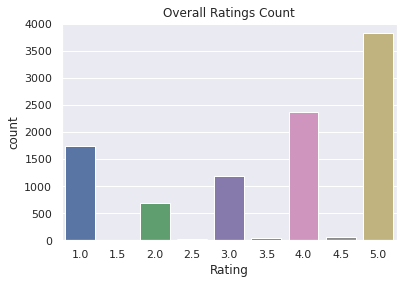

In [140]:
#visualizing different ratings count
sns.countplot(x=reviews_df['Rating'])
plt.title('Overall Ratings Count')

**Even if majority ratings are good, we still have considerable count of poor ratings.**

**Critics in the Industry**

In today's Internet-driven, social-media world, customers have all the power they need to make or break a business. If customers have a positive experience, they share that experience with friends, family, and acquaintances and leading to new business. All this word-of-mouth marketing is for free and when this experience is shared on a public platform, this goes to any person on that platform. 
 When you can't deliver a positive customer experience for any reason customers will complain. Zomato like any other business needs to work on the criticism especially with those reviewers who have been followed more in order to reduce the negative marketing impact. Every industry must fight the grievances and criticisms it receives in order to grow its loyal customer base.

 Here, an effort has been made to group the customers with a good number of followers who have given more reviews with constantly low ratings to understand the fields that need to be worked on.

In [141]:
#grouping reviewers with low rating and high reviews and followers
critics_df = reviews_df.groupby(['Reviewer','Reviews','Followers'])['Rating'].mean().reset_index().sort_values(by=['Rating','Reviews','Followers'],
            ascending=[True,False,False],ignore_index=True)
critics_df = critics_df[:30]
critics_df.head()

Reviewer  Reviews  Followers  Rating
0                           Sumit    401.0     2736.0     1.0
1                             D.S    195.0     2079.0     1.0
2                       Ram Raju.    115.0      282.0     1.0
3  Farhaan Nasir (bankruptfoodie)    107.0      503.0     1.0
4               Suyash Dhandhania     92.0      495.0     1.0

In [142]:
#all the top 30 critics have given avg rating as 1
critics_df['Rating'].value_counts()

1.0    30
Name: Rating, dtype: int64

Text(0.5, 1.0, 'Critics in the Industry')

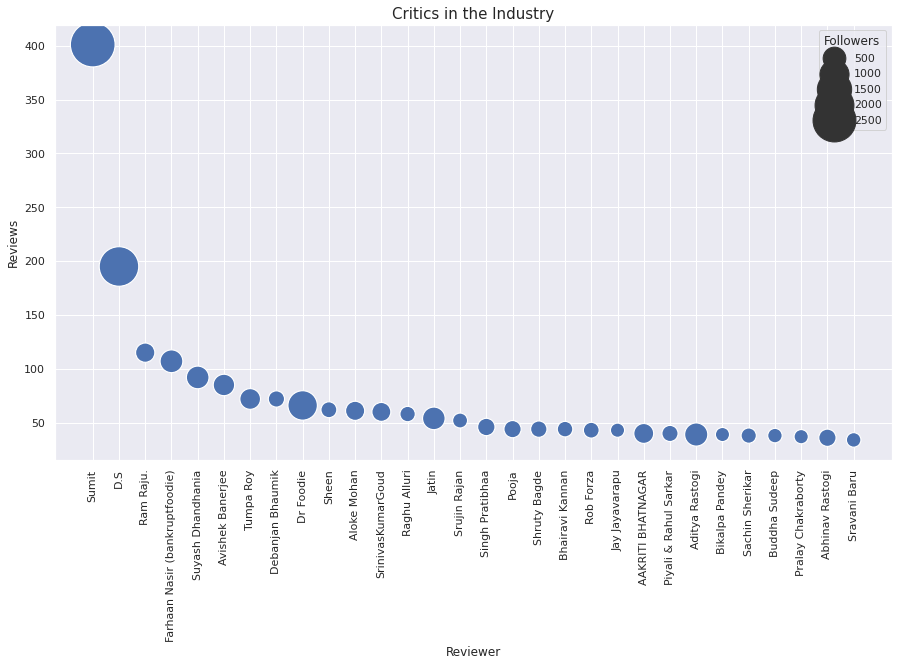

In [143]:
#visualizing critics through scatterplot
plt.figure(figsize=(15,8))
sns.scatterplot(data=critics_df, x="Reviewer", y="Reviews", size="Followers",alpha=1, legend=True, sizes=(200, 2000))
plt.xticks(rotation=90)
ax.axes.get_xaxis().set_visible(False)
plt.title('Critics in the Industry',size=15)

###**Sentiment Analysis**

####**Text Pre-Processing and Text Visualization**

In [144]:
# storing reviews in a variable for data processing
reviews=reviews_df.Review
reviews

0       The ambience was good, food was quite good . h...
1       Ambience is too good for a pleasant evening. S...
2       A must try.. great food great ambience. Thnx f...
3       Soumen das and Arun was a great guy. Only beca...
4       Food is good.we ordered Kodi drumsticks and ba...
                              ...                        
9995    Madhumathi Mahajan Well to start with nice cou...
9996    This place has never disappointed us.. The foo...
9997    Bad rating is mainly because of "Chicken Bone ...
9998    I personally love and prefer Chinese Food. Had...
9999    Checked in here to try some delicious chinese ...
Name: Review, Length: 9954, dtype: object

In [145]:
!pip install contractions

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [146]:
# functions for text preprocessing 
def lower_case(text):
  '''convert the string in lower case 
  '''
  text=[x.lower() for x in text]
  return text

import string
def remove_punctuation (text):
  '''remove punctuation from the the list of strings
  '''
  text = [''.join(c for c in s if c not in string.punctuation) for s in text]
  return text

import re
regex = re.compile('[^a-zA-Z]')
def remove_non_leters(text):
  '''used to remove all non leters form the list 
  '''
  text=[regex.sub(' ', x) for x in text]
  return text

def remove_all_extra_spaces (text):
  '''removes all extra space from the text
  '''
  for index,x in enumerate(text):
    text[index]=" ".join(x.split())
  return text
  
import string
ascii_chars = set(string.printable)  # speeds things up
def remove_non_ascii_prinatble_from_list(list_of_words):
  '''removes non ascii charaters from text
  '''
  return [word for word in list_of_words 
            if all(char in ascii_chars for char in word)]

import contractions
def remove_contrations(text):
  '''shotents the words form 
  '''
  for index,x in enumerate(text):
    text[index] = contractions.fix(x)
  return text

def lemmatization_(text):
  '''converting to root words
  '''
  for index,x in enumerate(text):
    doc = nlp(x)  
    l=list()
    for word in doc:
        l.append(word.lemma_)
    text[index]=' '.join(l)

  return text
  

def Change_text(msg):
  '''Removing StopWord
  '''
  main_text=[word for word in no_punc.split() if word.lower() not in stop_list]
  return ' '.join(main_text)

def remove_stop_words (text):
  test_2=[]
  for x in reviews:
    test_1=[]
    for i in x.split(' '):
      if i not in stop_word_list:
        test_1.append(i)
    test_2.append(' '.join(test_1))
  return test_2

In [147]:
#download small spacy model
!python -m spacy download en_core_web_sm

2022-08-09 22:21:53.758343: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 12.8 MB 5.3 MB/s 
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [148]:
import spacy
nlp = spacy.load('en_core_web_sm')
# Print the set of spaCy's default stop words and adding common words of data set
print(nlp.Defaults.stop_words)
print(nlp.vocab['-PRON-'].is_stop)

{'regarding', 'above', 'mostly', 'our', 'herein', 'indeed', 'doing', 'several', 'wherein', 'any', 'she', 'seeming', 'besides', 'sixty', 'up', 'however', 'keep', 'unless', 'there', "'d", 'see', 'off', 'their', 'at', 'herself', 'together', 'amongst', 'various', 'before', 'your', "'ve", 'this', 'thereupon', 'except', 'had', 'now', 'into', 'say', 'all', "n't", 'over', 'those', 'ever', 'has', 'but', 'whither', 'former', 'seemed', 'yourselves', 'never', 'even', 'another', 'they', 'nor', 'not', 'whose', 'therefore', 'part', 'both', 'from', 'seems', '’re', 'thereafter', 'once', 'moreover', 'hers', 'fifteen', 'put', 'make', 'noone', 'whom', 'why', 'must', 'alone', 'so', 'although', 'may', 'each', 'whether', 'around', 'too', 'via', 'much', 're', 'beside', 'twenty', 'yours', 'were', 'everywhere', 'third', 'below', 'after', 'towards', 'formerly', 'himself', 'two', 'or', 'who', 'should', 'have', 'during', 'them', 'few', 'per', 'whereafter', 'his', 'for', 'throughout', 'do', 'meanwhile', 'get', 'am'

In [149]:
# Add the word to the set of stop words. Use lowercase!
nlp.Defaults.stop_words.add('-PRON-')

# Set the stop_word tag on the lexeme
nlp.vocab['-PRON-'].is_stop = True

In [150]:
# storing nlp stop wors in a list
stop_word_list=list(nlp.Defaults.stop_words)
stop_word_list

['regarding',
 'above',
 'mostly',
 'our',
 'herein',
 'indeed',
 'doing',
 'several',
 'wherein',
 'any',
 'she',
 'seeming',
 'besides',
 'sixty',
 'up',
 'however',
 'keep',
 'unless',
 'there',
 "'d",
 'see',
 'off',
 'their',
 'at',
 'herself',
 'together',
 'amongst',
 'various',
 'before',
 'your',
 "'ve",
 'this',
 'thereupon',
 'except',
 'had',
 'now',
 'into',
 'say',
 'all',
 "n't",
 'over',
 'those',
 'ever',
 'has',
 'but',
 'whither',
 'former',
 'seemed',
 'yourselves',
 'never',
 'even',
 'another',
 'they',
 'nor',
 'not',
 'whose',
 'therefore',
 'part',
 'both',
 'from',
 'seems',
 '’re',
 'thereafter',
 'once',
 'moreover',
 'hers',
 'fifteen',
 'put',
 'make',
 'noone',
 'whom',
 'why',
 'must',
 'alone',
 'so',
 'although',
 'may',
 'each',
 'whether',
 'around',
 'too',
 'via',
 'much',
 're',
 'beside',
 'twenty',
 'yours',
 'were',
 'everywhere',
 'third',
 'below',
 'after',
 'towards',
 'formerly',
 'himself',
 'two',
 'or',
 'who',
 'should',
 'have',
 'dur

In [151]:
'''
convert the string in lower case, remove punctuation, non leters(numbers, emoji etc), 
extra spaces, and non ascii characters, lemmatization and removing stop words
'''
reviews=lower_case(reviews)
reviews=remove_punctuation(reviews)
reviews=remove_non_leters(reviews)
reviews=remove_all_extra_spaces(reviews)
reviews=remove_non_ascii_prinatble_from_list(reviews)
reviews=remove_contrations(reviews)
reviews=lemmatization_(reviews)
reviews=remove_stop_words(reviews)

In [152]:
all_words=' '.join(reviews)
all_words

'ambience good food good saturday lunch cost effective good place sate brunch chill friend parent waiter souman das courteous helpful ambience good pleasant evening service prompt food good good experience souman das kudo service try great food great ambience thnx service pradeep subroto personal recommendation penne alfredo pasta music background amazing soumen das arun great guy behavior sincerety good food course I like visit place food goodwe order kodi drumstick basket mutton biryani good thank pradeep serve enjoy ambience good ambiance good service good food apradeecp subro good service food good papiya good hostess caption good star restaurant nice place ambience different food order tasty service gud worth visit reasonable visit place read review finally visit placeambience good come food crispy corn nice tawa fish ok basket biryani disappoint biryani ok flattering claim staff polite prompt especially pradeep suman excellent food specially like spicy food courteous staff shubro

In [153]:
reviews

['ambience good food good saturday lunch cost effective good place sate brunch chill friend parent waiter souman das courteous helpful',
 'ambience good pleasant evening service prompt food good good experience souman das kudo service',
 'try great food great ambience thnx service pradeep subroto personal recommendation penne alfredo pasta music background amazing',
 'soumen das arun great guy behavior sincerety good food course I like visit place',
 'food goodwe order kodi drumstick basket mutton biryani good thank pradeep serve enjoy ambience good',
 'ambiance good service good food apradeecp subro good service food good papiya good hostess caption good star restaurant',
 'nice place ambience different food order tasty service gud worth visit reasonable visit place',
 'read review finally visit placeambience good come food crispy corn nice tawa fish ok basket biryani disappoint biryani ok flattering claim staff polite prompt especially pradeep suman',
 'excellent food specially like 

In [154]:
# storing the reviews in a feature of df
reviews_df['Reviews']=reviews
reviews_df.head()

Restaurant              Reviewer  \
0  Beyond Flavours     Rusha Chakraborty   
1  Beyond Flavours  Anusha Tirumalaneedi   
2  Beyond Flavours       Ashok Shekhawat   
3  Beyond Flavours        Swapnil Sarkar   
4  Beyond Flavours                Dileep   

                                              Review  Rating  Pictures  \
0  The ambience was good, food was quite good . h...     5.0       0.0   
1  Ambience is too good for a pleasant evening. S...     5.0       0.0   
2  A must try.. great food great ambience. Thnx f...     5.0       0.0   
3  Soumen das and Arun was a great guy. Only beca...     5.0       0.0   
4  Food is good.we ordered Kodi drumsticks and ba...     5.0       0.0   

                                             Reviews  Followers    Year  \
0  ambience good food good saturday lunch cost ef...        2.0  2019.0   
1  ambience good pleasant evening service prompt ...        2.0  2019.0   
2  try great food great ambience thnx service pra...        3.0  2019.0   
3  soumen das arun great guy behavior sincerety g...        1.0  2019.0   
4  food goodwe order kodi drumstick basket mutton...        2.0  2019.0   

   Month  Hour  
0    5.0  15.0  
1    5.0  14.0  
2    5.0  22.0  
3    5.0  22.0  
4    5.0  21.0

In [155]:
#function to removing words greater than 45 and less than 2
def len_less_than2(review):
  review=" ".join([i for i in review.split() if len(i)>2])
  review=" ".join([i for i in review.split() if len(i)<=45])
  return review

In [156]:
#removing words greater than 45 and less than 2
reviews_df['Reviews']=reviews_df['Reviews'].apply(lambda x:len_less_than2(x))

In [157]:
# droping the unview column
reviews_df=reviews_df.drop('Review',axis=1)

In [158]:
reviews_df

Restaurant              Reviewer  Rating  Pictures  \
0      Beyond Flavours     Rusha Chakraborty     5.0       0.0   
1      Beyond Flavours  Anusha Tirumalaneedi     5.0       0.0   
2      Beyond Flavours       Ashok Shekhawat     5.0       0.0   
3      Beyond Flavours        Swapnil Sarkar     5.0       0.0   
4      Beyond Flavours                Dileep     5.0       0.0   
...                ...                   ...     ...       ...   
9995  Chinese Pavilion      Abhishek Mahajan     3.0       0.0   
9996  Chinese Pavilion        Sharad Agrawal     4.5       0.0   
9997  Chinese Pavilion             Ramandeep     1.5       3.0   
9998  Chinese Pavilion       Nayana Shanbhag     4.0       0.0   
9999  Chinese Pavilion      Bhargava Krishna     3.5       6.0   

                                                Reviews  Followers    Year  \
0     ambience good food good saturday lunch cost ef...        2.0  2019.0   
1     ambience good pleasant evening service prompt ...        2.0  2019.0   
2     try great food great ambience thnx service pra...        3.0  2019.0   
3     soumen das arun great guy behavior sincerety g...        1.0  2019.0   
4     food goodwe order kodi drumstick basket mutton...        2.0  2019.0   
...                                                 ...        ...     ...   
9995  madhumathi mahajan start nice courteous server...       54.0  2016.0   
9996  place disappoint food courteous staff serene a...       53.0  2016.0   
9997  bad rating mainly chicken bone find veg food a...      423.0  2016.0   
9998  personally love prefer chinese food couple tim...      144.0  2016.0   
9999  check try delicious chinese food nonveg lunche...     1302.0  2016.0   

      Month  Hour  
0       5.0  15.0  
1       5.0  14.0  
2       5.0  22.0  
3       5.0  22.0  
4       5.0  21.0  
...     ...   ...  
9995    6.0   0.0  
9996    6.0  22.0  
9997    6.0  10.0  
9998    5.0  17.0  
9999    5.0  16.0  

[9954 rows x 9 columns]

In [159]:
#reviews data
sen_df = reviews_df.copy()
reviews_df.head(1)

Restaurant           Reviewer  Rating  Pictures  \
0  Beyond Flavours  Rusha Chakraborty     5.0       0.0   

                                             Reviews  Followers    Year  \
0  ambience good food good saturday lunch cost ef...        2.0  2019.0   

   Month  Hour  
0    5.0  15.0

In [160]:
#reviews dataset
sen_df.head(1)

Restaurant           Reviewer  Rating  Pictures  \
0  Beyond Flavours  Rusha Chakraborty     5.0       0.0   

                                             Reviews  Followers    Year  \
0  ambience good food good saturday lunch cost ef...        2.0  2019.0   

   Month  Hour  
0    5.0  15.0

In [161]:
#function to remove punctuation from the reviews
def remove_punctuation(text):
    '''a function for removing punctuation'''
    import string
    # replacing the punctuations with empty string, 
    # which in effect deletes the punctuation marks 
    translator = str.maketrans('', '', string.punctuation)
    # return the text stripped of punctuation marks
    return text.translate(translator)

In [162]:
#applying remove punctuation to whole dataset
sen_df['Reviews'] = sen_df['Reviews'].apply(remove_punctuation)

In [163]:
#removing stopwords
#importing stopwords
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [164]:
# extracting the stopwords from nltk library
stopword = stopwords.words('english')

#creating a function to remove stopwords
def remove_stopwords(text):
    '''a function for removing the stopword'''
    # removing the stop words and lowercasing the selected words
    text = [word.lower() for word in text.split() if word.lower() not in stopword]
    # joining the list of words with space separator
    return " ".join(text)

sen_df['Reviews'] = sen_df['Reviews'].apply(remove_stopwords)

In [165]:
#assigning ratings into positive, neutral and negative sentiments for visualization
sen_df['sentiment'] = sen_df['Rating'].apply(lambda rating : 1 if rating > 3.5 else (0 if 3 <= rating <= 3.5 else -1))

Text(0.5, 1.0, 'Number of Positive, Neutral and Negative Sentiments')

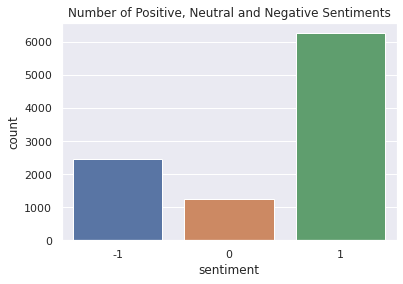

In [166]:
#visualizing number of sentiments
sns.countplot(x=sen_df['sentiment'])
plt.title('Number of Positive, Neutral and Negative Sentiments',size=12)

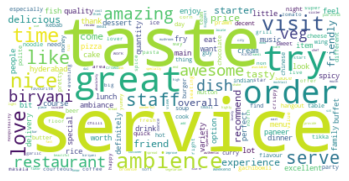

In [167]:
#visualizing review text
#importing wordcloud
from wordcloud import WordCloud

#visualizing negative and positive reviews seperately
positive_reviews = sen_df[sen_df['sentiment'] == 1]
negative_reviews = sen_df[sen_df['sentiment'] == -1]

#since these words were in the overall wordcloud and doesn't contribute in distinguishing between neg and positive sentiments
stopword.extend(["food","good",'place','chicken','ordered']) 
#positive wordcloud
pos_text = " ".join(reviews for reviews in positive_reviews.Reviews)
pos_wordcloud = WordCloud(collocations = False, background_color = 'white',stopwords=stopword).generate(pos_text)
plt.imshow(pos_wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

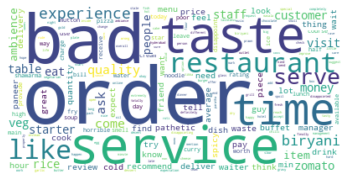

In [168]:
#negative wordcloud
neg_text = " ".join(review for review in negative_reviews.Reviews)
neg_wordcloud = WordCloud(collocations = False, background_color = 'white',stopwords=stopword).generate(neg_text)
plt.imshow(neg_wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

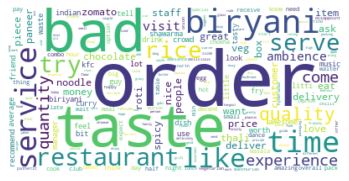

In [169]:
#word cloud for restaurants in low ratings df
low_rating_reviews=sen_df.loc[sen_df['Restaurant'].isin(list(low_rating_df['Name']))]
rev_text = " ".join(review for review in low_rating_reviews.Reviews)
rev_wordcloud = WordCloud(collocations = False, background_color = 'white',stopwords=stopword).generate(rev_text)
plt.imshow(rev_wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

**Looking at the words involved in the reviews of the restaurants with low ratings it can be understood that the customers didn't like the taste, good worst experience, or maybe the order packaging wasn't good. As earlier stated some of these restaurants had medium-ranged prices.**

In [170]:
#assigning ratings into positive and negative sentiments i.e. binary problem
sen_df['sentiment'] = sen_df['Rating'].apply(lambda rating : 1 if rating > 3 else 0)

In [171]:
sen_df

Restaurant              Reviewer  Rating  Pictures  \
0      Beyond Flavours     Rusha Chakraborty     5.0       0.0   
1      Beyond Flavours  Anusha Tirumalaneedi     5.0       0.0   
2      Beyond Flavours       Ashok Shekhawat     5.0       0.0   
3      Beyond Flavours        Swapnil Sarkar     5.0       0.0   
4      Beyond Flavours                Dileep     5.0       0.0   
...                ...                   ...     ...       ...   
9995  Chinese Pavilion      Abhishek Mahajan     3.0       0.0   
9996  Chinese Pavilion        Sharad Agrawal     4.5       0.0   
9997  Chinese Pavilion             Ramandeep     1.5       3.0   
9998  Chinese Pavilion       Nayana Shanbhag     4.0       0.0   
9999  Chinese Pavilion      Bhargava Krishna     3.5       6.0   

                                                Reviews  Followers    Year  \
0     ambience good food good saturday lunch cost ef...        2.0  2019.0   
1     ambience good pleasant evening service prompt ...        2.0  2019.0   
2     try great food great ambience thnx service pra...        3.0  2019.0   
3     soumen das arun great guy behavior sincerety g...        1.0  2019.0   
4     food goodwe order kodi drumstick basket mutton...        2.0  2019.0   
...                                                 ...        ...     ...   
9995  madhumathi mahajan start nice courteous server...       54.0  2016.0   
9996  place disappoint food courteous staff serene a...       53.0  2016.0   
9997  bad rating mainly chicken bone find veg food a...      423.0  2016.0   
9998  personally love prefer chinese food couple tim...      144.0  2016.0   
9999  check try delicious chinese food nonveg lunche...     1302.0  2016.0   

      Month  Hour  sentiment  
0       5.0  15.0          1  
1       5.0  14.0          1  
2       5.0  22.0          1  
3       5.0  22.0          1  
4       5.0  21.0          1  
...     ...   ...        ...  
9995    6.0   0.0          0  
9996    6.0  22.0          1  
9997    6.0  10.0          0  
9998    5.0  17.0          1  
9999    5.0  16.0          1  

[9954 rows x 10 columns]

In [172]:
#selecting features
sen_df['Index'] = list(range(0,len(sen_df)))
sen_df.set_index(['Index','Restaurant','Reviewer'],inplace=True)
sen_df = sen_df[['Reviews','sentiment']]

In [173]:
#import stemmer
from nltk.stem.snowball import SnowballStemmer
# create an object of stemming function
stemmer = SnowballStemmer("english")

def stemming(text):    
    '''a function which stems each word in the given text'''
    text = [stemmer.stem(word) for word in text.split()]
    return " ".join(text) 

#applying stemmer
sen_df['Reviews'] = sen_df['Reviews'].apply(stemming)

## **Modeling**

### **Sentiment Analysis ( UnSupervised )**

In [174]:
# setting tokens by TfidfVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf=TfidfVectorizer(stop_words=stop_word_list)
transformed_reviews=tfidf.fit_transform(reviews_df['Reviews'])

### **LDA**

In [175]:
from sklearn.decomposition import LatentDirichletAllocation

In [176]:
# Parameters tuning using Grid Search
from sklearn.model_selection import GridSearchCV

# LDA model
lda = LatentDirichletAllocation(n_components=5)
lda.fit(transformed_reviews)

LatentDirichletAllocation(n_components=5)

In [177]:
lda.components_

array([[0.20000754, 0.44779626, 0.30441877, ..., 0.93777163, 0.60838403,
        0.20001369],
       [0.20003221, 0.20006652, 0.20005234, ..., 0.20008984, 0.2000363 ,
        0.2000713 ],
       [0.20003804, 0.20007774, 0.20006338, ..., 0.20010496, 0.20004218,
        0.20008125],
       [0.44832558, 0.20007265, 0.20005721, ..., 0.20009847, 0.20004133,
        0.20008832],
       [0.20473242, 0.20001469, 0.20002338, ..., 0.2000206 , 0.20430006,
        0.38293675]])

In [178]:
# checking for top 15 words in each topic
for index,topic in enumerate(lda.components_):
    print(f'THE TOP 15 WORDS FOR TOPIC #{index}')
    print([tfidf.get_feature_names()[i] for i in topic.argsort()[-15:]])
    print('\n')

THE TOP 15 WORDS FOR TOPIC #0
['restaurant', 'awesome', 'try', 'service', 'bad', 'place', 'nice', 'time', 'delivery', 'biryani', 'taste', 'chicken', 'order', 'good', 'food']


THE TOP 15 WORDS FOR TOPIC #1
['nyc', 'das', 'nandan', 'singer', 'vry', 'sonalin', 'packing', 'verry', 'voice', 'cold', 'superb', 'taste', 'food', 'service', 'good']


THE TOP 15 WORDS FOR TOPIC #2
['nuts', 'carry', 'cock', 'bag', 'yuck', 'wastage', 'salty', 'sup', 'quality', 'receive', 'low', 'poor', 'job', 'bad', 'quantity']


THE TOP 15 WORDS FOR TOPIC #3
['delivary', 'sarvice', 'ferrero', 'incomplete', 'doughnut', 'soon', 'rocher', 'goo', 'service', 'bahadur', 'happy', 'oily', 'spicy', 'tasty', 'excellent']


THE TOP 15 WORDS FOR TOPIC #4
['experience', 'try', 'friend', 'amazing', 'love', 'time', 'nice', 'staff', 'visit', 'ambience', 'great', 'service', 'food', 'good', 'place']




In [179]:
!pip install pyLDAvis==2.1.2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [180]:
import pyLDAvis.sklearn
pyLDAvis.enable_notebook()

/usr/local/lib/python3.7/dist-packages/past/types/oldstr.py:5: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Iterable
/usr/local/lib/python3.7/dist-packages/past/builtins/misc.py:4: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Mapping


In [181]:
# ploting the clusters top 30 terms 
lda_panel = pyLDAvis.sklearn.prepare(lda, transformed_reviews,tfidf,mds='tsne')
lda_panel

PreparedData(topic_coordinates=                x           y  topics  cluster       Freq
topic                                                    
0      150.222153  -72.269554       1        1  42.442474
4       51.163364 -159.968018       2        1  40.980841
1      -73.144554   21.523815       3        1   6.026213
3      -66.410133 -110.606438       4        1   5.480777
2       54.417324   12.443444       5        1   5.069696, topic_info=                 Term        Freq       Total Category  logprob  loglift
5537             good  612.000000  612.000000  Default  30.0000  30.0000
4400        excellent   77.000000   77.000000  Default  29.0000  29.0000
10772        quantity   96.000000   96.000000  Default  28.0000  28.0000
1056              bad  150.000000  150.000000  Default  27.0000  27.0000
3476         delivery  124.000000  124.000000  Default  26.0000  26.0000
...               ...         ...         ...      ...      ...      ...
11608           salty    1.553907    8.829517   Topic5  -7.0881   1.2446
5525              gol    0.773653    2.040663   Topic5  -7.7855   2.0120
13410        tastless    0.678293    1.419345   Topic5  -7.9170   2.2435
10752         quality    2.350876  100.304804   Topic5  -6.6741  -0.7715
11254  responsibility    0.723471    1.950102   Topic5  -7.8525   1.9903

[326 rows x 6 columns], token_table=       Topic      Freq   Term
term                         
107        3  0.714505   ache
216        3  0.561107   agen
301        5  0.595006  allah
326        2  0.894261  allow
342        1  0.934621   aloo
...      ...       ...    ...
14919      3  0.680388  wonka
14989      1  0.969637   wrap
15008      3  0.546279  wrost
15096      5  0.571150   yuck
15135      5  0.872299    yup

[420 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 5, 2, 4, 3])

In [182]:
# predicting the sentiments and storing in a feature
topic_results = lda.transform(transformed_reviews)
reviews_df['sentiments']=topic_results.argmax(axis=1)
reviews_df.head()

Restaurant              Reviewer  Rating  Pictures  \
0  Beyond Flavours     Rusha Chakraborty     5.0       0.0   
1  Beyond Flavours  Anusha Tirumalaneedi     5.0       0.0   
2  Beyond Flavours       Ashok Shekhawat     5.0       0.0   
3  Beyond Flavours        Swapnil Sarkar     5.0       0.0   
4  Beyond Flavours                Dileep     5.0       0.0   

                                             Reviews  Followers    Year  \
0  ambience good food good saturday lunch cost ef...        2.0  2019.0   
1  ambience good pleasant evening service prompt ...        2.0  2019.0   
2  try great food great ambience thnx service pra...        3.0  2019.0   
3  soumen das arun great guy behavior sincerety g...        1.0  2019.0   
4  food goodwe order kodi drumstick basket mutton...        2.0  2019.0   

   Month  Hour  sentiments  
0    5.0  15.0           4  
1    5.0  14.0           4  
2    5.0  22.0           4  
3    5.0  22.0           3  
4    5.0  21.0           0

In [183]:
reviews_df['Rating'].value_counts()

5.0    3826
4.0    2373
1.0    1735
3.0    1192
2.0     684
4.5      69
3.5      47
2.5      19
1.5       9
Name: Rating, dtype: int64

In [184]:
reviews_df.shape

(9954, 10)

In [185]:
reviews_df[reviews_df['sentiments']==4 ]['Rating'].value_counts()

5.0    1666
4.0    1147
1.0     538
3.0     510
2.0     238
4.5      45
3.5      30
2.5      14
1.5       4
Name: Rating, dtype: int64

In [186]:
reviews_df[reviews_df['sentiments']==3 ]['Rating'].value_counts()

5.0    99
3.0    23
1.0    18
4.0    13
2.0     9
Name: Rating, dtype: int64

In [187]:
reviews_df[reviews_df['sentiments']==2 ]['Rating'].value_counts()

1.0    51
5.0    38
3.0    15
4.0    14
2.0    14
Name: Rating, dtype: int64

In [188]:
reviews_df[reviews_df['sentiments']==1 ]['Rating'].value_counts()

5.0    373
4.0     78
1.0     34
3.0     22
2.0     15
Name: Rating, dtype: int64

In [189]:
reviews_df[reviews_df['sentiments']==0 ]['Rating'].value_counts()

5.0    1650
4.0    1121
1.0    1094
3.0     622
2.0     408
4.5      24
3.5      17
1.5       5
2.5       5
Name: Rating, dtype: int64

In [190]:
reviews_df[reviews_df['Rating']==3].shape

(1192, 10)

### **Non-negative matrix Factorization**

In [191]:
from sklearn.decomposition import NMF

In [192]:
nmf_model = NMF(n_components=5,random_state=42)

In [193]:
nmf_model.fit(transformed_reviews)

NMF(n_components=5, random_state=42)

In [194]:
# top most frequnt word used in each topic
for index,topic in enumerate(nmf_model.components_):
    print(f'THE TOP 15 WORDS FOR TOPIC #{index}')
    print([tfidf.get_feature_names()[i] for i in topic.argsort()[-15:]])
    print('\n')

THE TOP 15 WORDS FOR TOPIC #0
['test', 'polite', 'packing', 'quality', 'price', 'ambiance', 'quantity', 'ambience', 'spicy', 'burger', 'job', 'food', 'taste', 'service', 'good']


THE TOP 15 WORDS FOR TOPIC #1
['excellent', 'serve', 'try', 'friend', 'amazing', 'love', 'time', 'awesome', 'staff', 'visit', 'ambience', 'great', 'service', 'place', 'food']


THE TOP 15 WORDS FOR TOPIC #2
['music', 'sarvice', 'ambiance', 'overall', 'service', 'hangout', 'family', 'enjoy', 'thank', 'staff', 'ambience', 'place', 'friend', 'friendly', 'nice']


THE TOP 15 WORDS FOR TOPIC #3
['zomato', 'person', 'thank', 'awesome', 'guy', 'excellent', 'super', 'order', 'boy', 'quick', 'late', 'deliver', 'fast', 'time', 'delivery']


THE TOP 15 WORDS FOR TOPIC #4
['spicy', 'piece', 'try', 'paneer', 'veg', 'restaurant', 'like', 'quality', 'rice', 'quantity', 'biryani', 'bad', 'taste', 'order', 'chicken']




In [195]:
topic_results = nmf_model.transform(transformed_reviews)

In [196]:
reviews_df['sentiments']=topic_results.argmax(axis=1)

In [197]:
reviews_df[reviews_df['sentiments']==4]['Rating'].value_counts()

1.0    1084
4.0     666
5.0     530
3.0     470
2.0     358
3.5      24
4.5      18
1.5       7
2.5       6
Name: Rating, dtype: int64

In [198]:
reviews_df[reviews_df['sentiments']==3 ]['Rating'].value_counts()

5.0    282
1.0     98
4.0     65
3.0     36
2.0     25
4.5      3
3.5      2
2.5      1
Name: Rating, dtype: int64

In [199]:
reviews_df.Reviews[1]

'ambience good pleasant evening service prompt food good good experience souman das kudo service'

In [200]:
reviews_df.head()

Restaurant              Reviewer  Rating  Pictures  \
0  Beyond Flavours     Rusha Chakraborty     5.0       0.0   
1  Beyond Flavours  Anusha Tirumalaneedi     5.0       0.0   
2  Beyond Flavours       Ashok Shekhawat     5.0       0.0   
3  Beyond Flavours        Swapnil Sarkar     5.0       0.0   
4  Beyond Flavours                Dileep     5.0       0.0   

                                             Reviews  Followers    Year  \
0  ambience good food good saturday lunch cost ef...        2.0  2019.0   
1  ambience good pleasant evening service prompt ...        2.0  2019.0   
2  try great food great ambience thnx service pra...        3.0  2019.0   
3  soumen das arun great guy behavior sincerety g...        1.0  2019.0   
4  food goodwe order kodi drumstick basket mutton...        2.0  2019.0   

   Month  Hour  sentiments  
0    5.0  15.0           0  
1    5.0  14.0           0  
2    5.0  22.0           1  
3    5.0  22.0           1  
4    5.0  21.0           0

In [201]:
reviews_df['sentiments']=reviews_df['sentiments'].apply( lambda x : 'negative' if x==4 or x==3 else 'positive')

In [202]:
reviews_df[reviews_df['sentiments']=='negative']["Rating"].value_counts()

1.0    1182
5.0     812
4.0     731
3.0     506
2.0     383
3.5      26
4.5      21
2.5       7
1.5       7
Name: Rating, dtype: int64

In [203]:
reviews_df[reviews_df['sentiments']=='positive']["Rating"].value_counts()

5.0    3014
4.0    1642
3.0     686
1.0     553
2.0     301
4.5      48
3.5      21
2.5      12
1.5       2
Name: Rating, dtype: int64

### **Sentiment Analysis (Superviesd)**

### **Data Processing**

In [204]:
def sentiment(rating):
  if rating >=3.5:
    return 0 
    # positive sentiment
  else:
    return 1
    # neagative sentiment 

In [205]:
sentiment_df=reviews_df[['Reviews','Rating']]

In [206]:
sentiment_df['sentiment']=sentiment_df['Rating'].apply(lambda x:sentiment(x))
sentiment_df

Reviews  Rating  sentiment
0     ambience good food good saturday lunch cost ef...     5.0          0
1     ambience good pleasant evening service prompt ...     5.0          0
2     try great food great ambience thnx service pra...     5.0          0
3     soumen das arun great guy behavior sincerety g...     5.0          0
4     food goodwe order kodi drumstick basket mutton...     5.0          0
...                                                 ...     ...        ...
9995  madhumathi mahajan start nice courteous server...     3.0          1
9996  place disappoint food courteous staff serene a...     4.5          0
9997  bad rating mainly chicken bone find veg food a...     1.5          1
9998  personally love prefer chinese food couple tim...     4.0          0
9999  check try delicious chinese food nonveg lunche...     3.5          0

[9954 rows x 3 columns]

In [207]:
# defining blank list for the input of scores of models
model_accuracy=[]
model_precision=[]
model_recall=[]
model_f1_score=[]
model_roc_auc_score=[]
model_train_time=[]


In [208]:
# making a function to train the model and evaluate the model
def train_and_score (model,X_test,X_train,y_test,y_train, best_parameter=True, best_score=True):
  '''
  train the model and gives mse,rmse,r2,adj r2 score of the model
  can be used for any model where y is not transformed 
  '''

  #storing the start time of model training
  start=time.time()
  #training the model
  model.fit(X_train,y_train)
  #storing the time when the model ended trining 
  stop = time.time()
  #calculating the total time taken for model training 
  time_min=round((stop - start)/60,4)
  # printing the time taken to train the model
  print(f"Training time: {time_min}min")
  model_train_time.append(time_min)
  
  

  # finding the best parameters of the model if any 
  if best_parameter==True:
    # using try except method to avoid any error
    try:
      print("The best parameters found out to be :" ,model.best_params_)
    except:
      pass
  # finding best score of the model 
  if best_score==True:
    try:
      print(" \nwhere negative mean squared error is: ", model.best_score_,'\n')
    except:
      pass


  #predicting the values of y from x via model
  y_pred_test = model.predict(X_test)
  y_pred_train = model.predict(X_train)

  def score (actual,predicted,append=True):
    '''
    calcuating diffrent score matrix of the model
    '''
    # calculating accuracy score
    accuracy = accuracy_score(actual,predicted)
    # calculating precision score
    precision = precision_score(actual,predicted)
    # calculating recall score
    recall = recall_score(actual,predicted)
    # calculating f1_score score
    f1 = f1_score(actual,predicted)
    # calculating roc_auc_score score
    roc= roc_auc_score(actual,predicted)
    
    # printing all the scores
    print("\tThe accuracy is ", accuracy)
    print("\tThe precision is ", precision)
    print("\tThe recall is ", recall)
    print("\tThe f1 is ", f1)
    print('\tthe auc  is ',roc,'\n')
    print('\t\t\t\tclassification report\n','*'*80,'\n',classification_report(actual,predicted))
    

    # uploading all the score of the matrix in in the list 
    if append==True:
      model_accuracy.append(accuracy)
      model_precision.append(precision)
      model_recall.append(recall)
      model_f1_score.append(f1)
      model_roc_auc_score.append(roc)
    else:
      pass
# printing the score by the help of coustom score function
  # for train set
  print('\t\t\t\tscore matrix for train')
  print('*'*80)
  score(y_train,y_pred_train,False)
  print('\n')
  # for test set
  print('\t\t\t\tscore matrix for test')
  print('*'*80)
  score(y_test,y_pred_test)

In [209]:
# creating x and y varibles for independent and dependent variable
x = sentiment_df['Reviews']
y = sentiment_df['sentiment']

In [210]:
# spliting the data into train and test 
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.25,stratify=sentiment_df['sentiment'])

In [211]:
# creating topkens for text data
#import tfidf
from sklearn.feature_extraction.text import  TfidfVectorizer
#tfidf vectorizer
vectorizer = TfidfVectorizer()
X_train= vectorizer.fit_transform(X_train)
X_test=vectorizer.transform(X_test)

In [212]:
X_test.shape

(2489, 12893)

In [213]:
y_test.shape

(2489,)

### **MultinomialNB**

In [214]:
from sklearn.naive_bayes import MultinomialNB
# creating MultinomialNB model
model = MultinomialNB()
# training and evaluating the MultinomialNB
train_and_score(model,X_test,X_train,y_test,y_train)

Training time: 0.0002min
				score matrix for train
********************************************************************************
	The accuracy is  0.8589417280643
	The precision is  0.9755959137343927
	The recall is  0.6299010626603151
	The f1 is  0.7655310621242485
	the auc  is  0.8104108353842115 

				classification report
 ******************************************************************************** 
               precision    recall  f1-score   support

           0       0.82      0.99      0.90      4736
           1       0.98      0.63      0.77      2729

    accuracy                           0.86      7465
   macro avg       0.90      0.81      0.83      7465
weighted avg       0.88      0.86      0.85      7465



				score matrix for test
********************************************************************************
	The accuracy is  0.8143832864604259
	The precision is  0.9516129032258065
	The recall is  0.5186813186813187
	The f1 is  0.6714082503556189
	the au

In [215]:
# training the model
model.fit(X_train, y_train)

MultinomialNB()

In [216]:
# Test predictions
lr_test_pred = model.predict(X_test)

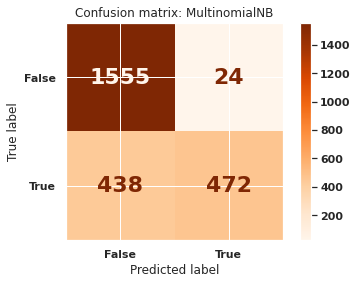

In [217]:
# Confusion matrix
from sklearn.metrics import confusion_matrix as cm
from sklearn.metrics import ConfusionMatrixDisplay as cmd
lr_confusion_matrix = cm(y_test, lr_test_pred)
cm_display = cmd(confusion_matrix = lr_confusion_matrix, display_labels = [False, True])

font = {'family' : 'DejaVu Sans',
        'weight' : 'bold',
        'size'   : 22}
plt.rc('font', **font)

cm_display.plot(cmap='Oranges')
plt.title('Confusion matrix: MultinomialNB')
plt.show()

### **Logistic Regression**

In [218]:
from sklearn.linear_model import LogisticRegression
# creating LogisticRegression model
log_reg = LogisticRegression()

In [219]:
# finding the best parameters for LogisticRegression by gridsearchcv
param_dict = {'C': [0.001,0.01,0.1,1,10,100],'penalty': ['l1', 'l2'],'max_iter':[1000]} 
log_reg_grid = GridSearchCV(log_reg, param_dict,n_jobs=-1, cv=5, verbose = 5,scoring='recall') 

In [220]:
# training and evaluating the DecisionTree
train_and_score(log_reg_grid, X_test, X_train, y_test, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
Training time: 0.1733min
The best parameters found out to be : {'C': 10, 'max_iter': 1000, 'penalty': 'l2'}
 
where negative mean squared error is:  0.7511933326612226 

				score matrix for train
********************************************************************************
	The accuracy is  0.9636972538513061
	The precision is  0.9651778955336866
	The recall is  0.9344082081348479
	The f1 is  0.949543846583504
	the auc  is  0.9574912662295861 

				classification report
 ******************************************************************************** 
               precision    recall  f1-score   support

           0       0.96      0.98      0.97      4736
           1       0.97      0.93      0.95      2729

    accuracy                           0.96      7465
   macro avg       0.96      0.96      0.96      7465
weighted avg       0.96      0.96      0.96      7465



				score matrix for test
*********************

In [221]:
# training the model
log_reg.fit(X_train, y_train)

LogisticRegression()

In [222]:
# Test predictions
lr_test_pred = log_reg.predict(X_test)

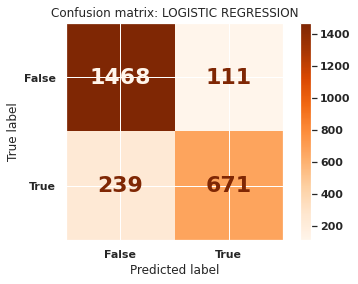

In [223]:
# Confusion matrix
from sklearn.metrics import confusion_matrix as cm
from sklearn.metrics import ConfusionMatrixDisplay as cmd
lr_confusion_matrix = cm(y_test, lr_test_pred)
cm_display = cmd(confusion_matrix = lr_confusion_matrix, display_labels = [False, True])

font = {'family' : 'DejaVu Sans',
        'weight' : 'bold',
        'size'   : 22}
plt.rc('font', **font)

cm_display.plot(cmap='Oranges')
plt.title('Confusion matrix: LOGISTIC REGRESSION')
plt.show()

### **Desision Tree**

In [224]:
from sklearn.tree import DecisionTreeClassifier
# creating DecisionTree model
DecisionTree = DecisionTreeClassifier(max_depth=10,max_leaf_nodes=45,criterion='entropy')

# training and evaluating the DecisionTree
train_and_score(DecisionTree,X_test, X_train, y_test, y_train)

Training time: 0.0152min
				score matrix for train
********************************************************************************
	The accuracy is  0.7835231078365706
	The precision is  0.6834817012858556
	The recall is  0.7596189080249176
	The f1 is  0.7195418257549463
	the auc  is  0.7784581026611074 

				classification report
 ******************************************************************************** 
               precision    recall  f1-score   support

           0       0.85      0.80      0.82      4736
           1       0.68      0.76      0.72      2729

    accuracy                           0.78      7465
   macro avg       0.77      0.78      0.77      7465
weighted avg       0.79      0.78      0.79      7465



				score matrix for test
********************************************************************************
	The accuracy is  0.7669746886299719
	The precision is  0.6624015748031497
	The recall is  0.7395604395604396
	The f1 is  0.6988577362409139
	the

In [225]:
# training the model
DecisionTree.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=10, max_leaf_nodes=45)

In [226]:
# Test predictions
lr_test_pred = DecisionTree.predict(X_test)

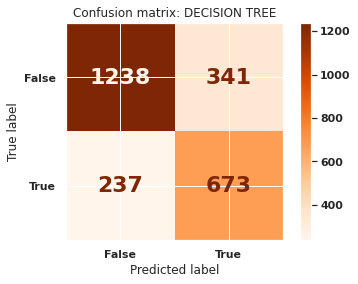

In [227]:
# Confusion matrix
dt_confusion_matrix = cm(y_test, lr_test_pred)
cm_display = cmd(confusion_matrix = dt_confusion_matrix, display_labels = [False, True])

font = {'family' : 'DejaVu Sans',
        'weight' : 'bold',
        'size'   : 22}
plt.rc('font', **font)

cm_display.plot(cmap='Oranges')
plt.title('Confusion matrix: DECISION TREE')
plt.show()

### **Random Forest**

In [228]:
from sklearn.ensemble import RandomForestClassifier

In [229]:
# creating RandomForestRegressor model
rfc=RandomForestClassifier()

In [230]:
rfc.get_params

<bound method BaseEstimator.get_params of RandomForestClassifier()>

In [231]:
# finding the best parameters for knn_model by gridsearchcv
grid_values_rf = {'n_estimators': [100,125,150],'max_depth': [7,10,15],'criterion': ['entropy']}
rfc_grid = GridSearchCV(estimator=rfc,param_grid = grid_values_rf, scoring='recall',cv=5,verbose=5,n_jobs=-1)

In [232]:
# training and evaluating the Random Forest Regressor
train_and_score(rfc_grid,X_train, X_test, y_train, y_test)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
Training time: 0.612min
The best parameters found out to be : {'criterion': 'entropy', 'max_depth': 15, 'n_estimators': 100}
 
where negative mean squared error is:  0.21318681318681318 

				score matrix for train
********************************************************************************
	The accuracy is  0.7525110486139012
	The precision is  1.0
	The recall is  0.3230769230769231
	The f1 is  0.48837209302325585
	the auc  is  0.6615384615384615 

				classification report
 ******************************************************************************** 
               precision    recall  f1-score   support

           0       0.72      1.00      0.84      1579
           1       1.00      0.32      0.49       910

    accuracy                           0.75      2489
   macro avg       0.86      0.66      0.66      2489
weighted avg       0.82      0.75      0.71      2489



				score matrix for test
*****************

In [233]:
# training the model
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [234]:
# Test predictions
lr_test_pred = rfc.predict(X_test)

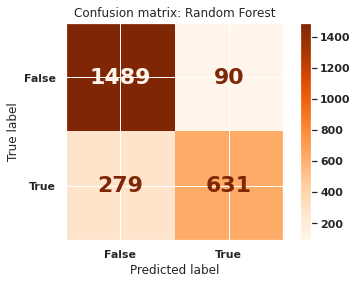

In [235]:
# Confusion matrix
dt_confusion_matrix = cm(y_test, lr_test_pred)
cm_display = cmd(confusion_matrix = dt_confusion_matrix, display_labels = [False, True])

font = {'family' : 'DejaVu Sans',
        'weight' : 'bold',
        'size'   : 22}
plt.rc('font', **font)

cm_display.plot(cmap='Oranges')
plt.title('Confusion matrix: Random Forest')
plt.show()

### **XGboost**

In [236]:
from xgboost import XGBClassifier

In [237]:
xgbc=XGBClassifier()

In [238]:
# finding the best parameters for XGBRegressor by gridsearchcv
xgbc_param={'n_estimators': [100,125,150],'max_depth': [7,10,15],'criterion': ['entropy']}
xgbc_grid=GridSearchCV(estimator=xgbc,param_grid=xgbc_param,cv=3,scoring='recall',verbose=5,n_jobs=-1)

In [239]:
# training and evaluating the xgb_grid
train_and_score(xgbc_grid,X_test, X_train, y_test, y_train)

Fitting 3 folds for each of 9 candidates, totalling 27 fits
Training time: 4.8927min
The best parameters found out to be : {'criterion': 'entropy', 'max_depth': 10, 'n_estimators': 150}
 
where negative mean squared error is:  0.7409253013213409 

				score matrix for train
********************************************************************************
	The accuracy is  0.9421299397186872
	The precision is  0.9271104499814057
	The recall is  0.9135214364235984
	The f1 is  0.9202657807308969
	the auc  is  0.9360681506442317 

				classification report
 ******************************************************************************** 
               precision    recall  f1-score   support

           0       0.95      0.96      0.95      4736
           1       0.93      0.91      0.92      2729

    accuracy                           0.94      7465
   macro avg       0.94      0.94      0.94      7465
weighted avg       0.94      0.94      0.94      7465



				score matrix for test
***

In [240]:
# training the model
xgbc.fit(X_train, y_train)

XGBClassifier()

In [241]:
# Test predictions
lr_test_pred = xgbc.predict(X_test)

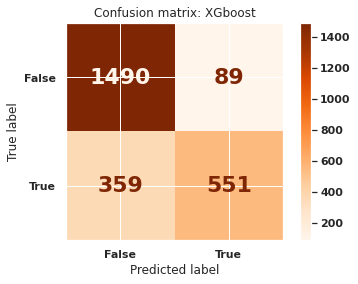

In [242]:
# Confusion matrix
dt_confusion_matrix = cm(y_test, lr_test_pred)
cm_display = cmd(confusion_matrix = dt_confusion_matrix, display_labels = [False, True])

font = {'family' : 'DejaVu Sans',
        'weight' : 'bold',
        'size'   : 22}
plt.rc('font', **font)

cm_display.plot(cmap='Oranges')
plt.title('Confusion matrix: XGboost')
plt.show()

### **lightGBM**

In [243]:
import lightgbm as lgb

In [244]:
lgbc=lgb.LGBMClassifier()

In [245]:
# finding the best parameters for XGBRegressor by gridsearchcv
lgbc_para={'n_estimators': [100,125,150],'max_depth': [15,20,25]}
lgbc_grid=GridSearchCV(estimator=lgbc,param_grid=lgbc_para,cv=3,scoring='recall',verbose=5,n_jobs=-1)

In [246]:
# training and evaluating the lgbr_grid
train_and_score(lgbc_grid,X_test, X_train, y_test, y_train)

Fitting 3 folds for each of 9 candidates, totalling 27 fits
Training time: 1.0681min
The best parameters found out to be : {'max_depth': 20, 'n_estimators': 150}
 
where negative mean squared error is:  0.7618104667609616 

				score matrix for train
********************************************************************************
	The accuracy is  0.9528466175485599
	The precision is  0.9416573764399851
	The recall is  0.9285452546720411
	The f1 is  0.9350553505535055
	the auc  is  0.9476974584171015 

				classification report
 ******************************************************************************** 
               precision    recall  f1-score   support

           0       0.96      0.97      0.96      4736
           1       0.94      0.93      0.94      2729

    accuracy                           0.95      7465
   macro avg       0.95      0.95      0.95      7465
weighted avg       0.95      0.95      0.95      7465



				score matrix for test
***************************

In [247]:
# training the model
lgbc.fit(X_train, y_train)

LGBMClassifier()

In [248]:
# Test predictions
lr_test_pred = lgbc.predict(X_test)

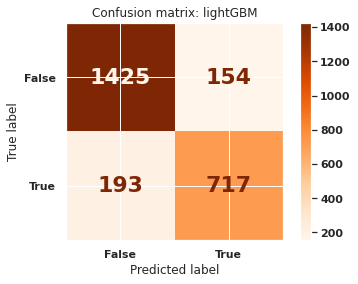

In [249]:
# Confusion matrix
dt_confusion_matrix = cm(y_test, lr_test_pred)
cm_display = cmd(confusion_matrix = dt_confusion_matrix, display_labels = [False, True])

font = {'family' : 'DejaVu Sans',
        'weight' : 'bold',
        'size'   : 22}
plt.rc('font', **font)

cm_display.plot(cmap='Oranges')
plt.title('Confusion matrix: lightGBM')
plt.show()

In [250]:
## score matrix for all the models 

In [251]:
#creating dictionary to store all the metrices 
dict={'accuracy':model_accuracy,'precision':model_precision,'recall':model_recall,'f1':model_f1_score,'roc_auc':model_roc_auc_score,'train_time':model_train_time}

In [252]:
# list of all models
model_name=['MultinomialNB','Logestic Regrestion','Desision Tree','Random forest','XGboost','lightGBM',]

In [253]:
# converting dictionary to dataframe
matrix_df=pd.DataFrame.from_dict(dict,orient="index",columns=model_name)

In [254]:
# taking the transpose of the dataframe to make it more visual appealing
matrix_df=matrix_df.transpose().reset_index().rename(columns={'index':'Models'})

In [255]:
matrix_df

Models  accuracy  precision    recall        f1   roc_auc  \
0        MultinomialNB  0.814383   0.951613  0.518681  0.671408  0.751741   
1  Logestic Regrestion  0.856569   0.822637  0.774725  0.797963  0.839231   
2        Desision Tree  0.766975   0.662402  0.739560  0.698858  0.761167   
3        Random forest  0.702880   0.986667  0.189813  0.318377  0.594168   
4              XGboost  0.866613   0.839202  0.785714  0.811578  0.849475   
5             lightGBM  0.862997   0.826636  0.791209  0.808535  0.847789   

   train_time  
0      0.0002  
1      0.1733  
2      0.0152  
3      0.6120  
4      4.8927  
5      1.0681

In [256]:
matrix_df.train_time.sum()

6.7615

### **ROC curve for all the models**

In [257]:
# finding the best parameters for all the models
log_reg_best=log_reg_grid.best_estimator_
rfc_best=rfc_grid.best_estimator_
xgbc_best=xgbc_grid.best_estimator_
lgbc_best=lgbc_grid.best_estimator_


In [258]:
# predicting the sentiment by all models
y_preds_proba_mnbc = model.predict_proba(X_test)[::,1]
y_preds_proba_lr = log_reg_best.predict_proba(X_test)[::,1]
y_preds_proba_dtc = DecisionTree.predict_proba(X_test)[::,1]
y_preds_proba_rfc = rfc_best.predict_proba(X_test)[::,1]
y_preds_proba_xgbc = xgbc_best.predict_proba(X_test)[::,1]
y_preds_proba_lgbc = lgbc_best.predict_proba(X_test)[::,1]

In [259]:
from sklearn.metrics import roc_curve

In [260]:
classifiers_proba = [(model, y_preds_proba_mnbc),
                     (log_reg_best, y_preds_proba_lr), 
                    (DecisionTree, y_preds_proba_dtc), 
                    (rfc_best, y_preds_proba_rfc),
                    (xgbc_best, y_preds_proba_xgbc),
                    (lgbc_best, y_preds_proba_lgbc)]

# Define a result table as a DataFrame
result_table = pd.DataFrame(columns=['classifiers', 'fpr','tpr','auc'])

# Train the models and record the results
for pair in classifiers_proba:
    
    fpr, tpr, _ = roc_curve(y_test,  pair[1])
    auc = roc_auc_score(y_test, pair[1])
    
    result_table = result_table.append({'classifiers':pair[0].__class__.__name__,
                                        'fpr':fpr, 
                                        'tpr':tpr, 
                                        'auc':auc}, ignore_index=True)

# Set name of the classifiers as index labels
result_table.set_index('classifiers', inplace=True)

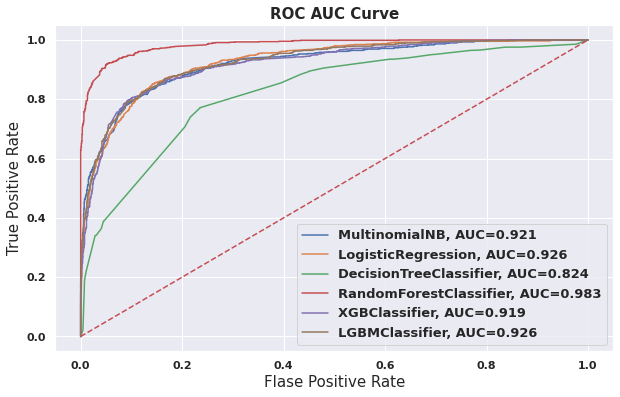

In [261]:
# ploting the roc auc curve for all models
fig = plt.figure(figsize=(10,6))

for i in result_table.index:
    plt.plot(result_table.loc[i]['fpr'], 
             result_table.loc[i]['tpr'], 
             label="{}, AUC={:.3f}".format(i, result_table.loc[i]['auc']))
    
plt.plot([0,1], [0,1],'r--')

plt.xlabel("Flase Positive Rate", fontsize=15)

plt.ylabel("True Positive Rate", fontsize=15)

plt.title('ROC AUC Curve', fontweight='bold', fontsize=15)
plt.legend(prop={'size':13}, loc='lower right')

plt.show()

In the business problem, predicting the negative sentiments correctly is really important but is more important for the models to reduce the number of false positives. False positives indicate that the reviews were actually negative but they were categorized as positive and this will lead to missing a complaint to work on.

Even though the number of false negatives is higher in the case of Logistic Regression than Random Forest, it is performing better in terms of reducing False positives. This indicates that Logistic Regression is penalizing False positives more just as we want.

###**Conclusion**
This is where the project ends and some of the important understandings to be drawn are:

* The best restaurants in Hyderabad are AB's - Absolute Barbecues, B-Dubs, and 3B's - Buddies, Bar & Barbecue.
* The most popular cuisines are the cuisines which most of the restaurants are willing to provide. The most popular cuisines in Hyderabad are North Indian, Chinese, Continental, and Hyderabadi.
* The restaurants in Hyderabadi have a flexible per person cost of 150 INR to 2800 INR. The cheapest is the food joint called Mohammedia Shawarma and the costliest restaurant is Collage - Hyatt Hyderabad Gachibowli.
* Upon conducting basic cost-benefit analysis on Zomato with a few assumptions one basis of the little business understanding that could be gathered, it can be concluded that it is important to separate out the restaurants with the lowest rating in order to improve its overall customer experience. These restaurants were small food joints or restaurants with high prices according to the food they are serving. Efforts should be made to advertise more and analyze the reviews, especially for these restaurants, and work on them. Mohammedia Shawarma seems to be profitable.
* Restaurant Clustering was done in two approaches. First with just two features and then with all of them. Kmeans Clustering worked well in the first approach but as we increase the dimensions, it isn't able to distinguish the clusters hence principal component analysis was done and then clustered into 6 clusters. The similarities in the data points within the clusters were pretty great. 
    -  **Cluster 0** - The restaurants in cluster 0 have mostly continental and fast foods available with them. The average rating is 3.42 and the average cost is 942 INR which includes an outlier of cost 2500 INR and a median cost of 600 INR. This means the restaurants are basically cheap in nature in this cluster beside one.
    -  **Cluster 1** - The restaurants in cluster 1 have mostly North Indian and other complementary foods available with them. The average rating is 3.63 and the average cost is 823 INR. These restaurants are slightly higher in prices than cluster 0.
    -  **Cluster 2** - The restaurants in cluster 2 have all the popular cuisines available with them including North Indian, Chinese and Complimentary.
The average rating is 3.77 which is better than the other two clusters and the average cost is 1331 INR. These restaurants are fine dining restaurants.
    -  **Cluster 3** - The restaurants in cluster 3 have all exotic cuisines available with them including Chinese, Thai, Asian, Seafood among others.
The average rating is 3.18 probably because these cuisines aren't that popular with the majority of the people in Hyderabad and the average cost is 890 INR.
    -  **Cluster 4** - The restaurants in cluster 4 are basically small food joints, bakeries, and cafes. The average rating is 3.14 and the average cost is 406 INR.
    -  **Cluster 5** - The restaurants in cluster 5 have popular cuisines available with them including North Indian, Chinese, and especially Hyderabadi.
The average rating is 3.24 the average cost is 674 INR. These restaurants are casual dining restaurants with lower per-person costs and ratings than cluster 2.

* Critics in the Industry were identified by grouping the customers with a good number of followers who have given more reviews with constantly low ratings. Sumit, D.S, and Ram Raju are the top three critics.

* Sentiment Analysis was done on the reviews and a model was trained in order to identify negative and positive sentiments. Even though the number of false negatives is higher in the case of Logistic Regression than Random Forest, it is performing better in terms of reducing False positives. This indicates that Logistic Regression is penalizing False positives more just as we want.


**Recommendations**
- Restaurants with negative reviews should be worked with in order to arrive at a win-win situation.
- Ratings should be collected on a category basis such as rating for packaging, delivery, taste, quality, quantity, service, etc. This would help in targetting specific fields that are lagging.